In [66]:
# Import du jeu de donnée
import pandas as pd
import numpy as np

# copy on write

df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
# On affiche les colonnes
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [67]:
# Autre import utile
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<Axes: >

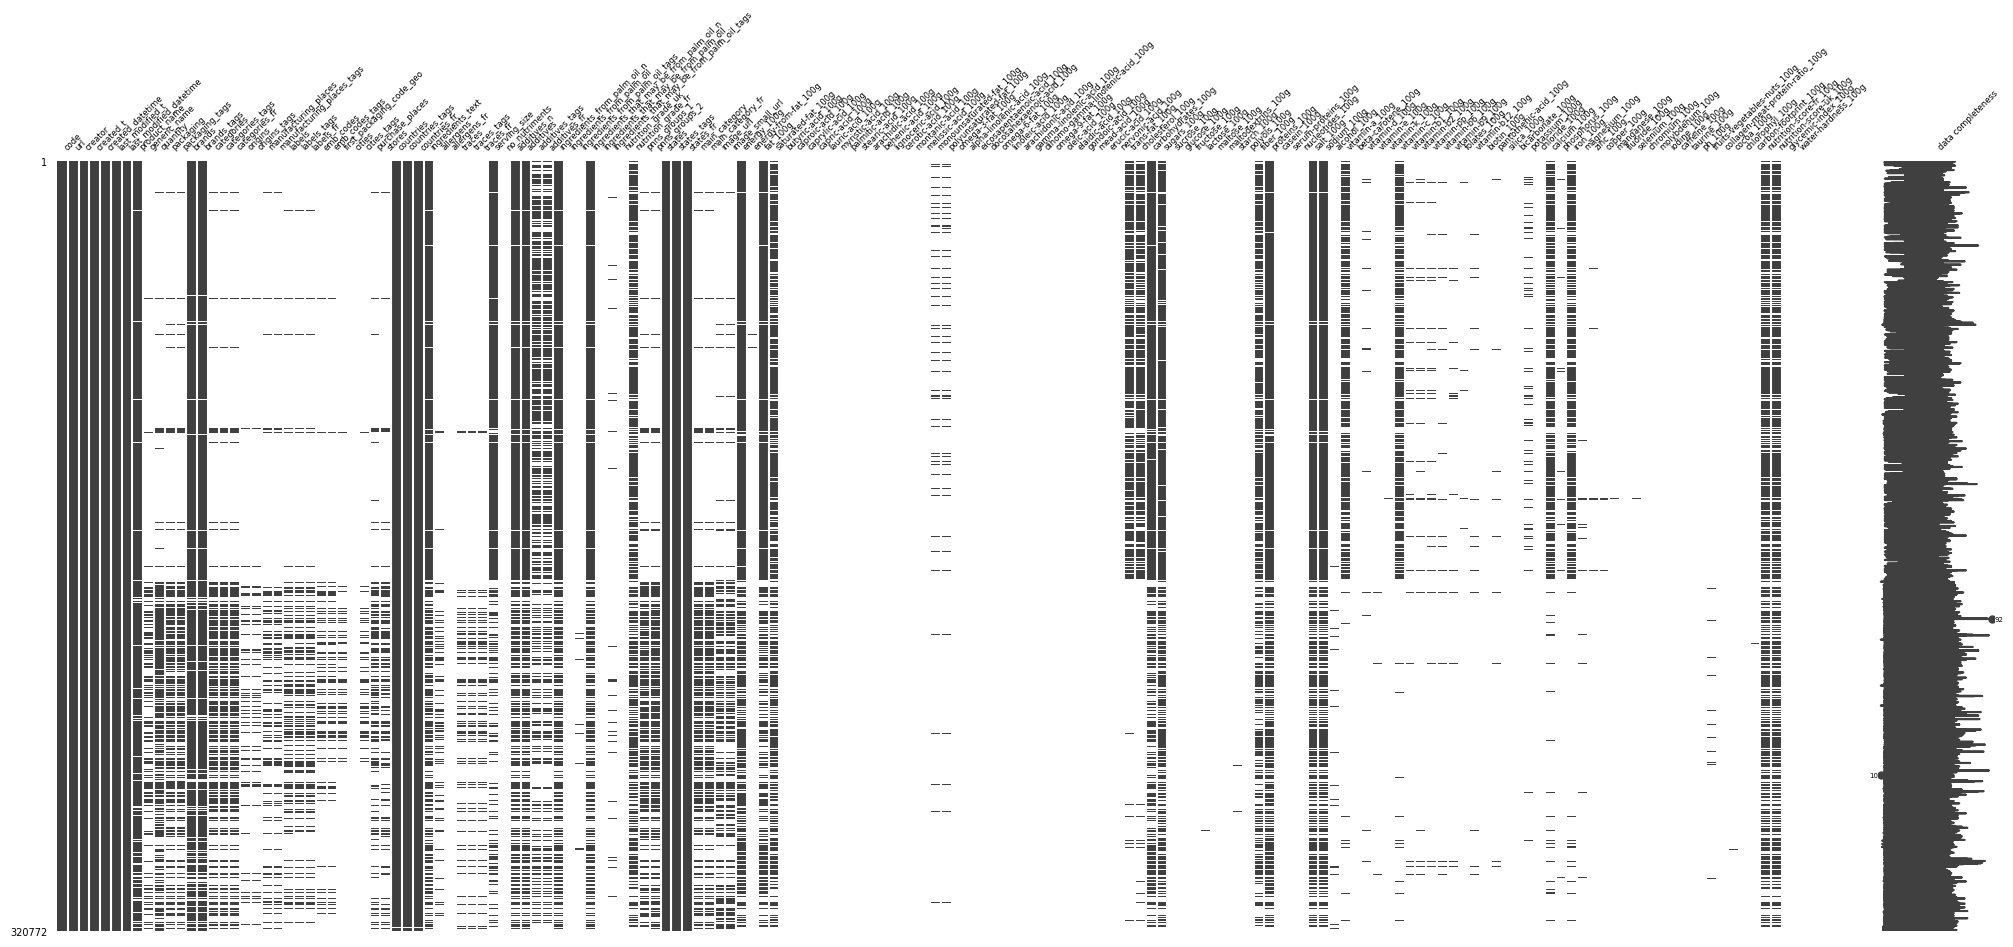

In [68]:
# missingno matrice avec label
msno.matrix(df, labels=True, fontsize=6)

<Axes: >

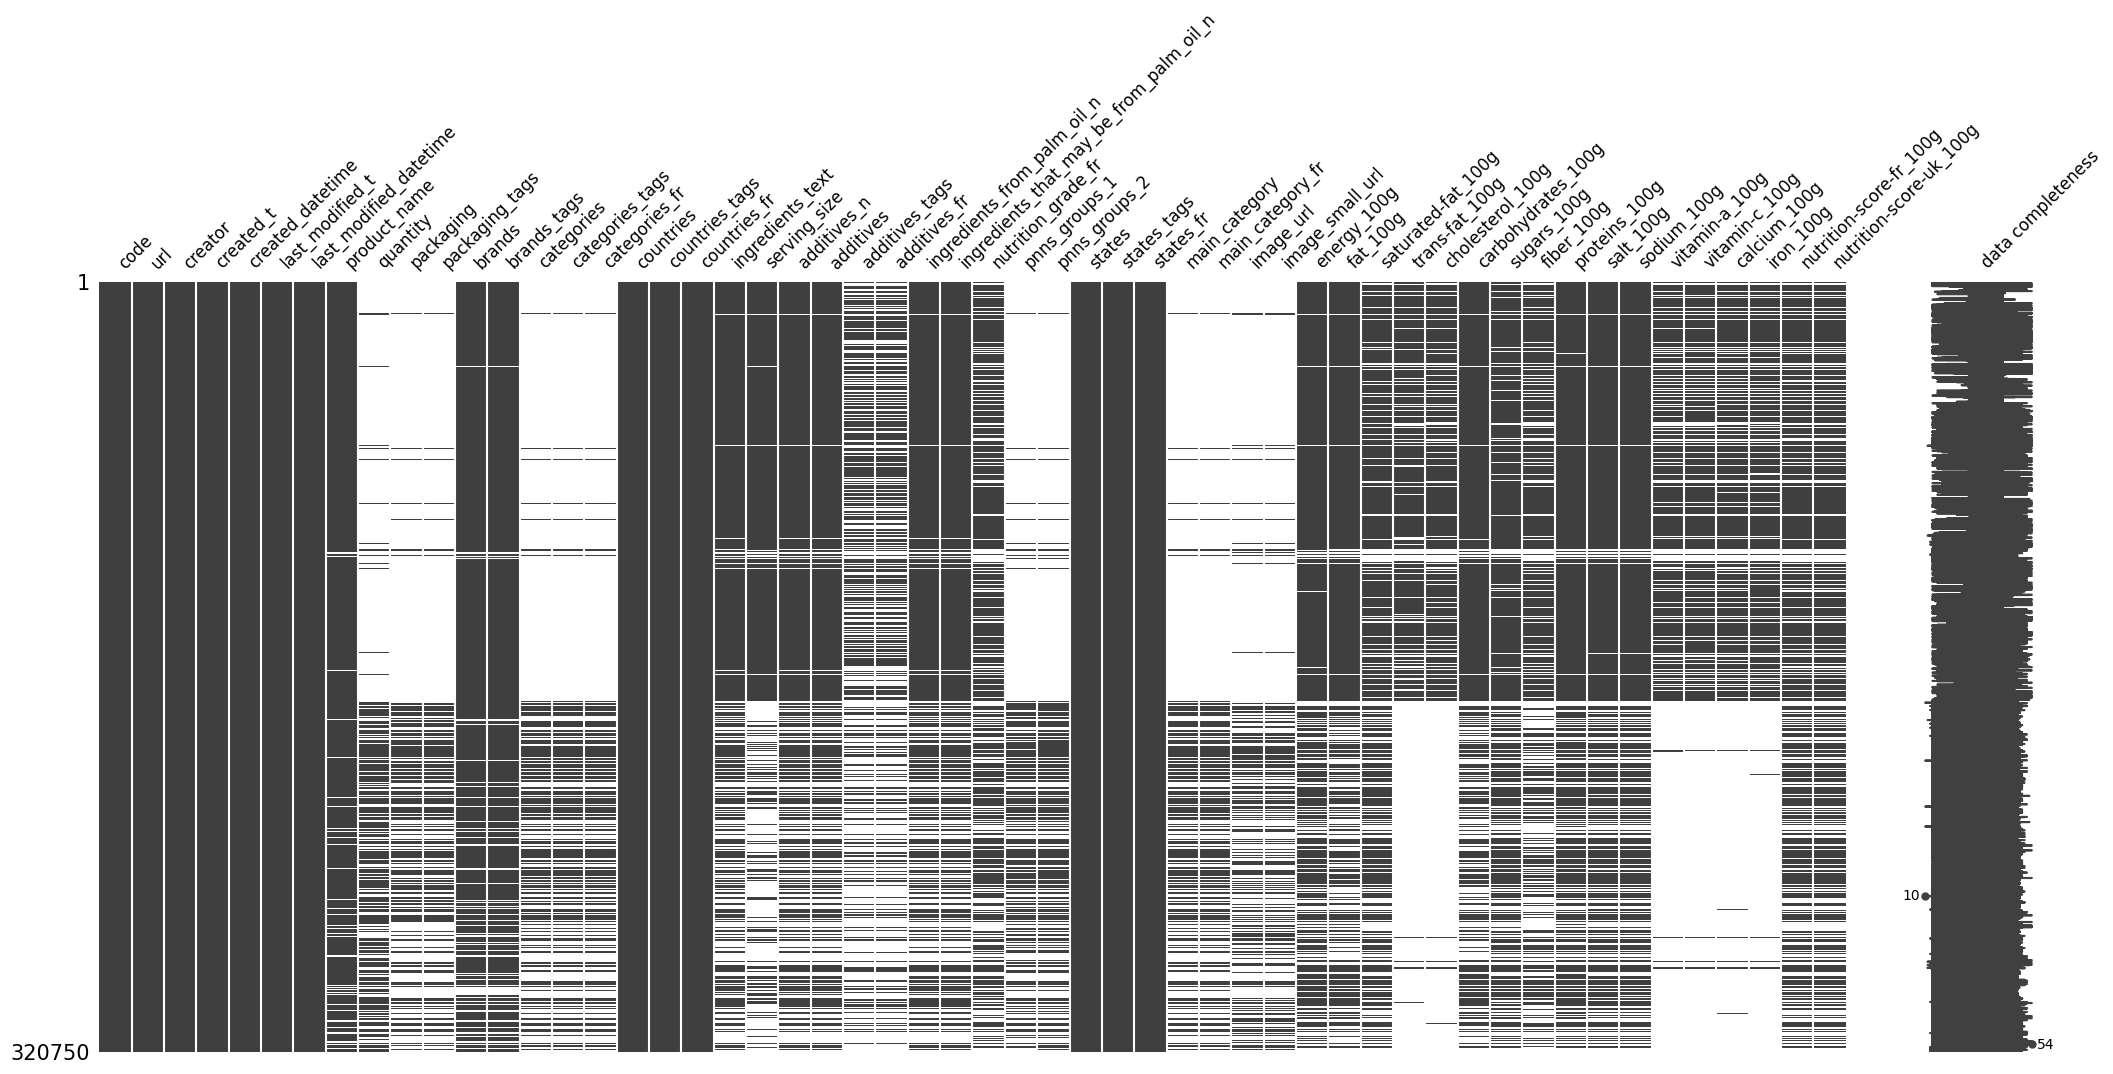

In [69]:
# On enlève les colonnes avec moins de 10% de valeurs présentes
df2_under_10 = df.dropna(thresh=0.2*df.shape[0], axis=1)
# On retire les doublons pour la catégorie code et on garde le premier
df2_under_10 = df2_under_10.drop_duplicates(subset='code', keep='first')
# On affiche les colonnes
msno.matrix(df2_under_10, labels=True, fontsize=12)

In [70]:
# Les pnns_groups_1 regroupe les différentes catégories de produits, cependant tout n'est pas orthographié de la même manière
df3_pnns = df2_under_10.copy()

# Nettoyage des valeurs de pnns_groups_1, enlever les - et mettre en majuscule, remplacer Unknown par NaN
df3_pnns['pnns_groups_1'] = df3_pnns['pnns_groups_1'].str.replace('-',' ').str.capitalize().replace('Unknown',np.nan)

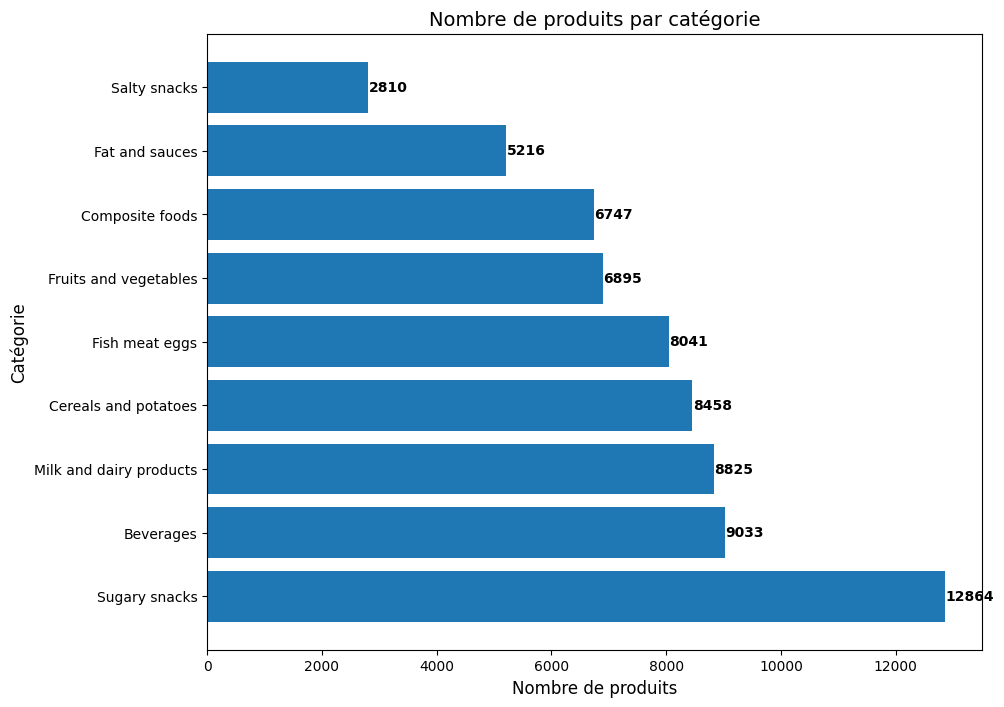

[nan 'Fruits and vegetables' 'Sugary snacks' 'Cereals and potatoes'
 'Composite foods' 'Fish meat eggs' 'Beverages' 'Fat and sauces'
 'Milk and dairy products' 'Salty snacks']
9


In [93]:

# Obtenir les valeurs et les étiquettes pour le graphique
categories = df3_pnns['pnns_groups_1'].value_counts().index
counts = df3_pnns['pnns_groups_1'].value_counts().values

# Créer le graphique (en ajustant la taille de la figure)
plt.figure(figsize=(10, 8))  # Augmenter la taille pour une meilleure lisibilité
plt.barh(categories, counts)

# Ajouter les étiquettes de données (avec des options de formatage)
for i, v in enumerate(counts):
    plt.text(v + 5, i, str(v), color='black', fontweight='bold', va='center')  # Ajouter un décalage pour la visibilité

# Personnaliser le graphique
plt.title('Nombre de produits par catégorie', fontsize=14)
plt.xlabel('Nombre de produits', fontsize=12)
plt.ylabel('Catégorie', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Afficher valeurs unique de la colonne pnns_groups_1
print(df3_pnns['pnns_groups_1'].unique())
print(df3_pnns['pnns_groups_1'].nunique())


Nous allons réaliser des box plots en fonction des data que nous avons et par catégorie pour voir si l'on peut prédire le jeu de donnée. A en juger par la matrice de missing no. Une bonne moitié d'entre eux sont présent malgré la présence des _100g. Peut être qu'une méthode de regression logistique pourrait fonctionner. On va réaliser quelques analyses complémentaires pour voir à l'oeil s'il y a quelques variations visuellement intéressantes.

<Axes: >

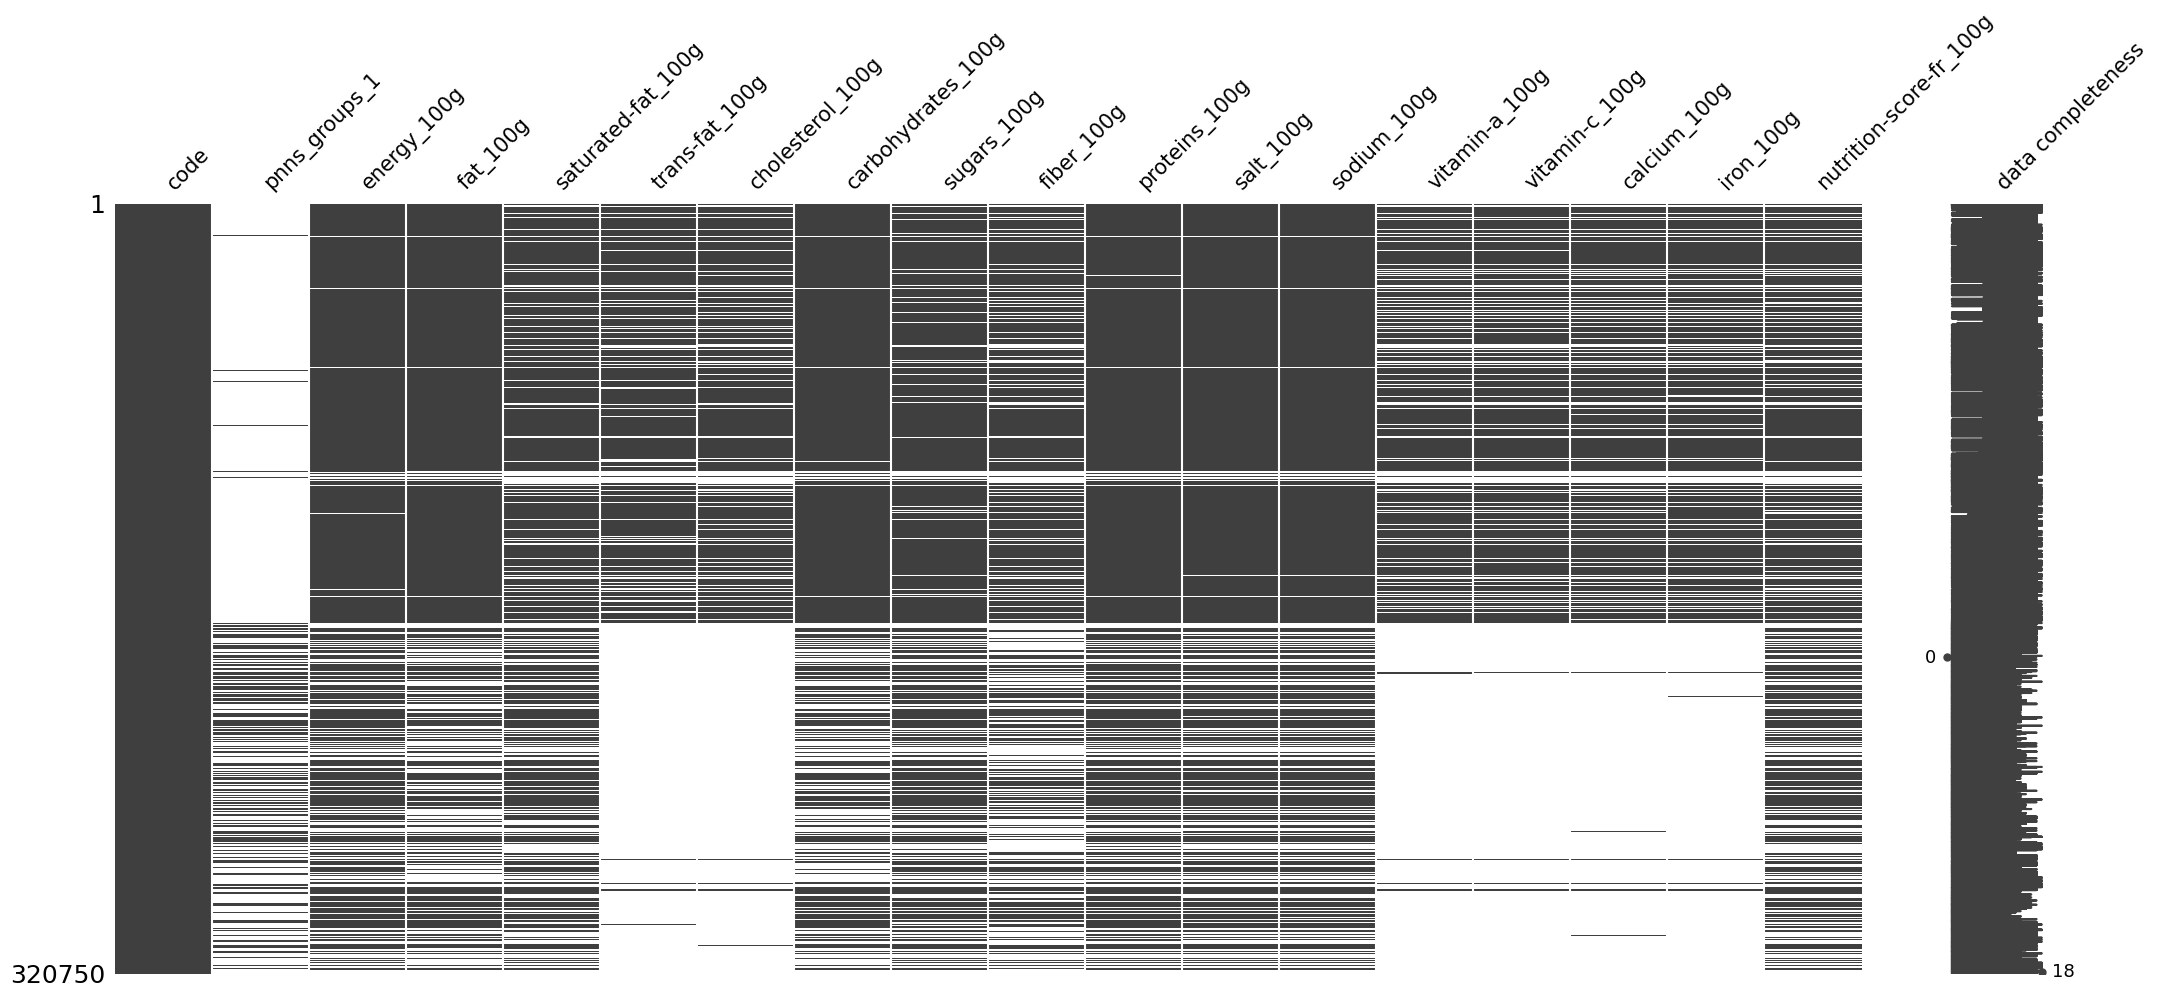

In [72]:
# Se débarasser des valeurs que l'on utilisera pas pour notre analyse (J'ai déjà réalisé le boxplot avec df3_pnns avant, et certaines données ne servait à rien, j'ai donc décidé d'itérer les graphiques qui viendront après avec df4 et df5)
df4_drop = df3_pnns.drop(columns=['url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size',
       'additives_n', 'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'nutrition-score-uk_100g'])
msno.matrix(df4_drop, labels=True, fontsize=15)

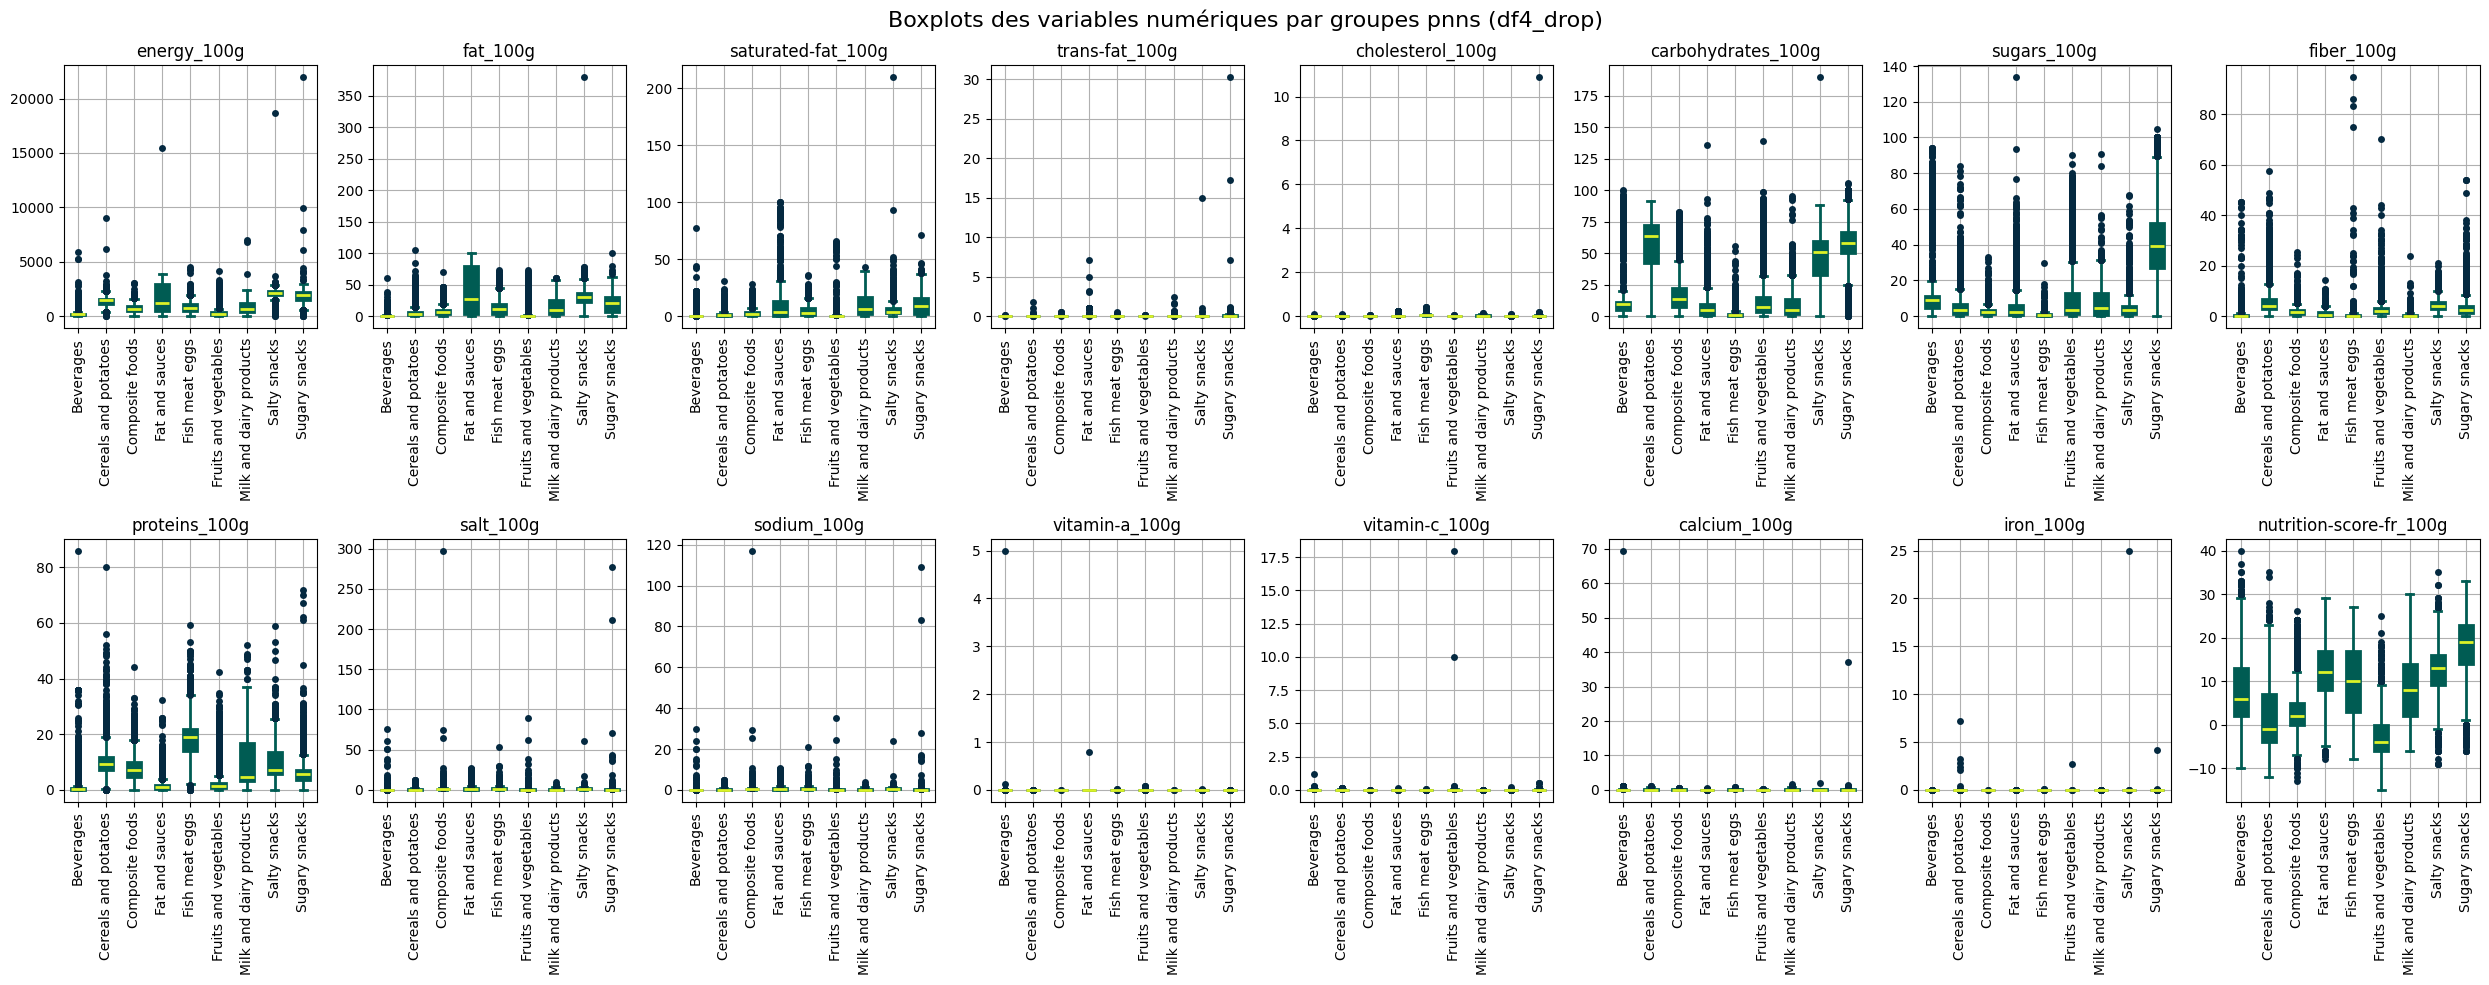

In [73]:
# Box plot pour les valeurs nutritionnelles (df4_drop)
def create_boxplots(df, df_name="DataFrame"):
    # Sélectionner les colonnes numériques
    num_cols = 8
    num_rows = int(np.ceil(len(df.select_dtypes(include=['float64']).columns) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5 * num_rows))
    axes = axes.flatten()

    # Créer les boxplots
    for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
        df.boxplot(column=col, by='pnns_groups_1', ax=axes[i], patch_artist=True,
                   boxprops=dict(facecolor='#005C53', color='#005C53', linewidth=2),
                   medianprops=dict(color='#DBF227', linewidth=2),
                   whiskerprops=dict(color='#005C53', linewidth=2),
                   capprops=dict(color='#005C53', linewidth=2),
                   flierprops=dict(marker='o', markersize=5, markerfacecolor='#042940', markeredgewidth=0))
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', labelrotation=90)

    for j in range(i + 1, num_cols * num_rows):
        fig.delaxes(axes[j])

    plt.suptitle(f'Boxplots des variables numériques par groupes pnns ({df_name})', fontsize=16)
    plt.tight_layout()
    plt.show()

create_boxplots(df4_drop, "df4_drop")

In [74]:
import numpy as np

df5_IQR = df4_drop.copy()

for category in df5_IQR['pnns_groups_1'].unique():
    category_data = df5_IQR[df5_IQR['pnns_groups_1'] == category]
    for col in df5_IQR.select_dtypes(include=['float64']).columns:
        Q1 = category_data[col].quantile(0.25)
        Q3 = category_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remplacement des valeurs aberrantes par NaN pour la catégorie et la colonne courantes
        df5_IQR.loc[(df5_IQR['pnns_groups_1'] == category) & 
                    ((df5_IQR[col] < lower_bound) | (df5_IQR[col] > upper_bound)), col] = np.nan


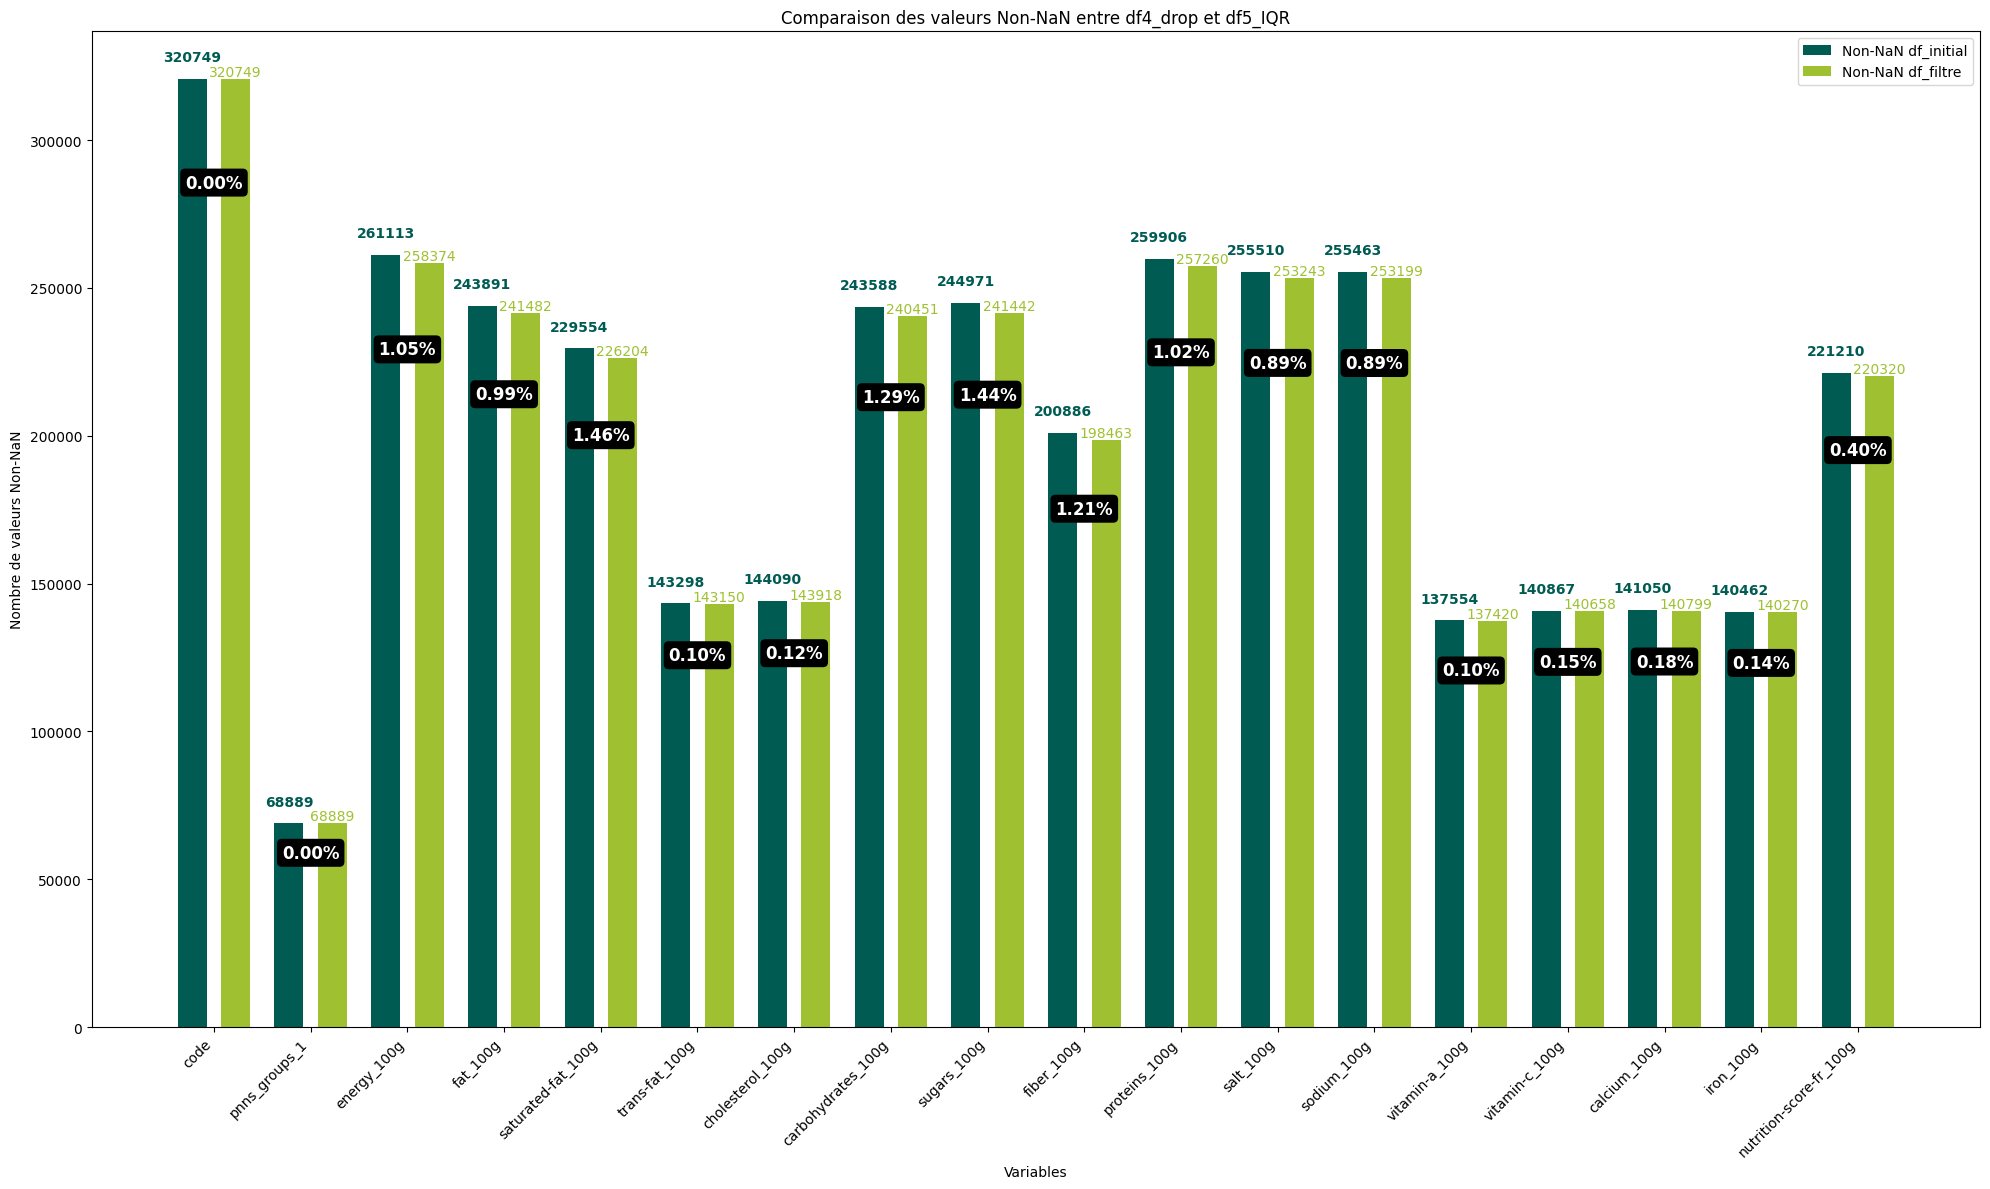

Quantité de NaN supplémentaire après traitement : 26760


In [75]:
def comparer_valeurs_non_nan(df_initial, df_filtre, titre=""):
    # Calcul des statistiques sur les NaN et non-NaN
    df_initial_non_nan = df_initial.notna().sum()
    df_filtre_non_nan = df_filtre.notna().sum()

    # Préparer les données pour le graphique
    variables = df_initial_non_nan.index
    non_nan_df_initial = df_initial_non_nan.values
    non_nan_df_filtre = df_filtre_non_nan.values

    # Calcul des pourcentages de réduction
    pourcentage_reduction = ((non_nan_df_initial - non_nan_df_filtre) / non_nan_df_initial) * 100

    # Indices pour le placement des barres
    x = np.arange(len(variables)) * 2  # Augmenter l'espacement entre les groupes de barres

    # Largeur des barres
    largeur = 0.6
    espacement_barres = 0.3  # Espacement entre les barres de chaque groupe

    # Couleurs des barres
    couleur_df_initial = '#005C53'  # Bleu foncé
    couleur_df_filtre = '#9FC131'  # Vert foncé

    # Créer le graphique pour la comparaison des non-NaN avant et après
    fig, ax = plt.subplots(figsize=(20, 12))

    # Barres pour df_initial et df_filtre côte à côte avec espacement
    bar1 = ax.bar(x - (largeur + espacement_barres)/2, non_nan_df_initial, largeur, label='Non-NaN df_initial', color=couleur_df_initial)
    bar2 = ax.bar(x + (largeur + espacement_barres)/2, non_nan_df_filtre, largeur, label='Non-NaN df_filtre', color=couleur_df_filtre)

    # Ajouter des étiquettes de données et des commentaires sur les pourcentages de réduction
    for i in range(len(variables)):
        # Réhausser uniquement les étiquettes de données des barres df_initial
        ax.text(x[i] - (largeur + espacement_barres)/2, non_nan_df_initial[i] + 5000, str(non_nan_df_initial[i]), ha='center', va='bottom', fontsize=10, color=couleur_df_initial, fontweight='bold')
        # Laisser les étiquettes de données des barres df_filtre à leur position d'origine
        ax.text(x[i] + (largeur + espacement_barres)/2, non_nan_df_filtre[i], str(non_nan_df_filtre[i]), ha='center', va='bottom', fontsize=10, color=couleur_df_filtre)
        # Ajouter les pourcentages de réduction avec une boîte noire sans bordure
        ax.text(x[i], min(non_nan_df_initial[i], non_nan_df_filtre[i]) - (max(non_nan_df_initial[i], non_nan_df_filtre[i]) * 0.10), 
                f'{pourcentage_reduction[i]:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold',
                bbox=dict(facecolor='black', edgecolor='none', boxstyle='round,pad=0.3'))

    ax.set_xlabel('Variables')
    ax.set_ylabel('Nombre de valeurs Non-NaN')
    ax.set_title(f'{titre}')
    ax.set_xticks(x)
    ax.set_xticklabels(variables, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

comparer_valeurs_non_nan(df4_drop, df5_IQR, "Comparaison des valeurs Non-NaN entre df4_drop et df5_IQR")


# Quantité de NaN ajoutés
print(f"Quantité de NaN supplémentaire après traitement : {df5_IQR.isna().sum().sum() - df4_drop.isna().sum().sum()}")

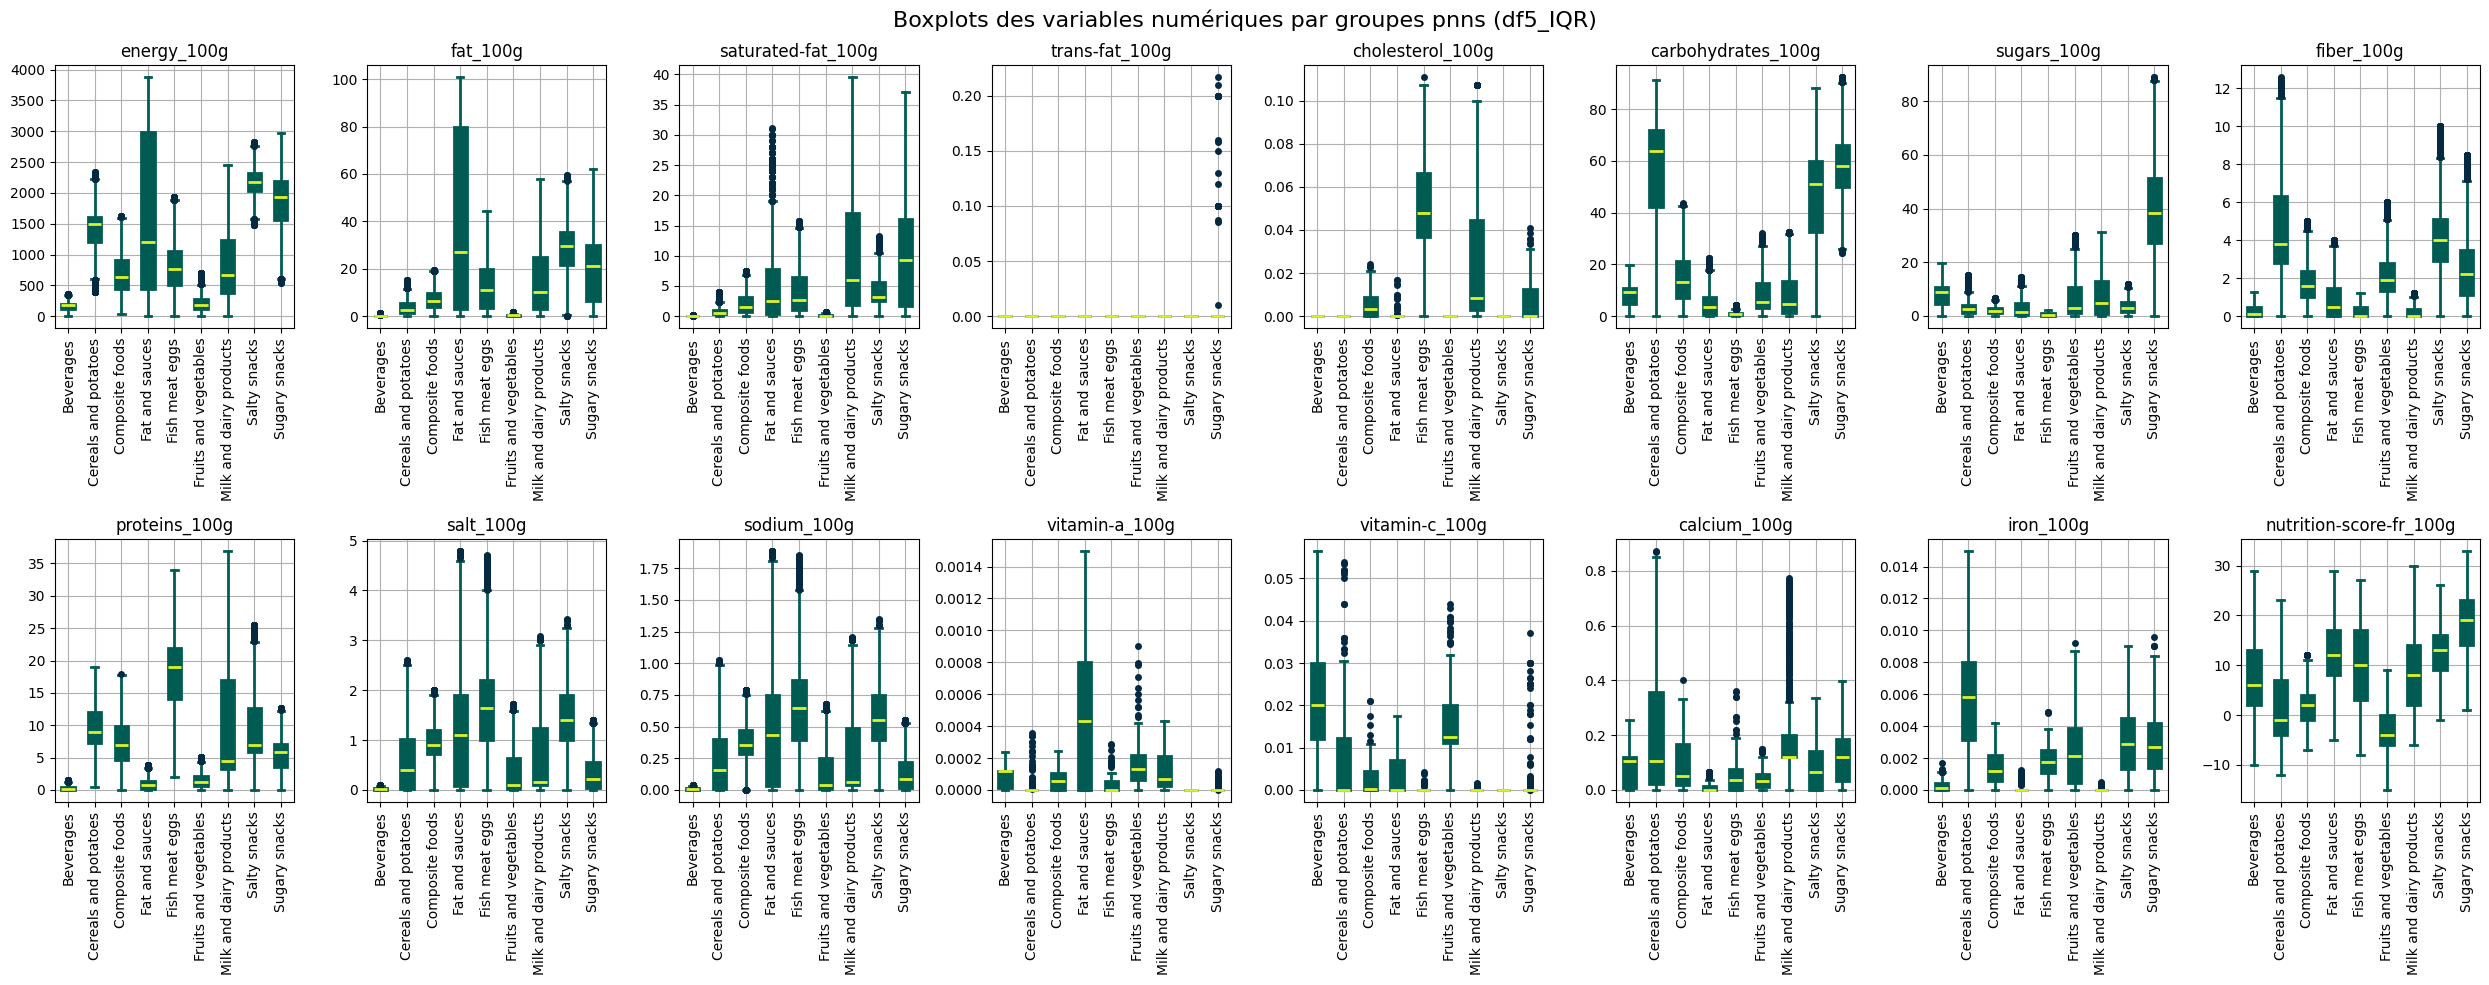

In [76]:
# On refait les boxplots avec df5_IQR
def create_boxplots(df, df_name="DataFrame"):
    # Sélectionner les colonnes numériques
    num_cols = 8
    num_rows = int(np.ceil(len(df.select_dtypes(include=['float64']).columns) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5 * num_rows))
    axes = axes.flatten()

    # Créer les boxplots
    for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
        df.boxplot(column=col, by='pnns_groups_1', ax=axes[i], patch_artist=True,
                   boxprops=dict(facecolor='#005C53', color='#005C53', linewidth=2),
                   medianprops=dict(color='#DBF227', linewidth=2),
                   whiskerprops=dict(color='#005C53', linewidth=2),
                   capprops=dict(color='#005C53', linewidth=2),
                   flierprops=dict(marker='o', markersize=5, markerfacecolor='#042940', markeredgewidth=0))
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', labelrotation=90)

    for j in range(i + 1, num_cols * num_rows):
        fig.delaxes(axes[j])

    plt.suptitle(f'Boxplots des variables numériques par groupes pnns ({df_name})', fontsize=16)
    plt.tight_layout()
    plt.show()

create_boxplots(df5_IQR, "df5_IQR")

In [77]:
# Réalisation d'un barplot

# Création d'un DataFrame avec les moyennes des variables numériques par catégorie de pnns_groups_1
df7_moyennes = df5_IQR.copy()
# On enlève la variable code qui n'est pas numérique
df7_moyennes = df7_moyennes.drop(columns='code')
df7_moyennes = df7_moyennes.groupby('pnns_groups_1').mean()


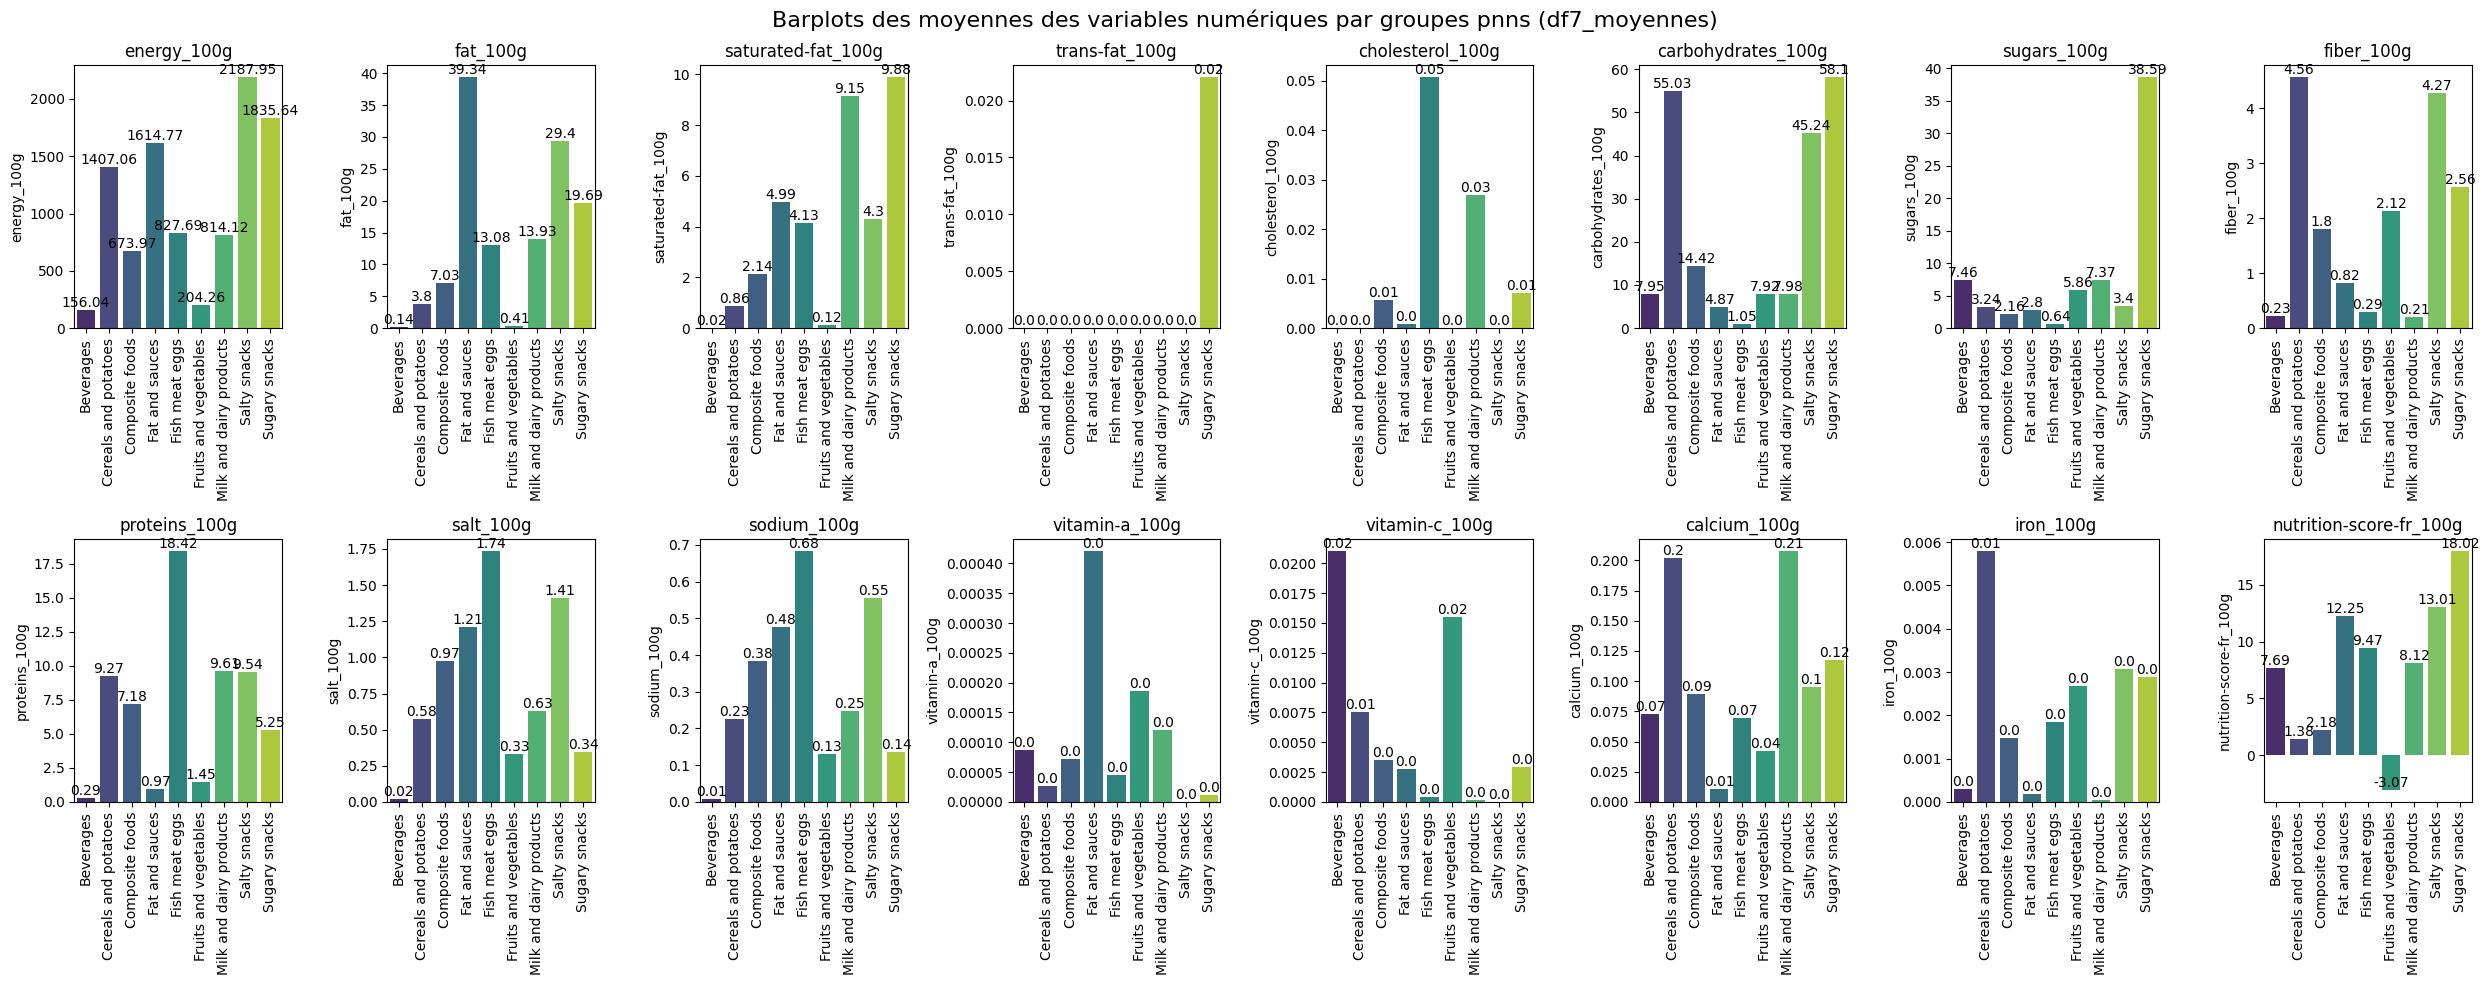

In [78]:
def create_barplots(df, df_name="DataFrame"):
    # Sélectionner les colonnes numériques
    num_cols = 8
    num_rows = int(np.ceil(len(df.select_dtypes(include=['float64']).columns) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5 * num_rows))
    axes = axes.flatten()

    # Créer les barplots
    for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
        # Calculer les moyennes par catégorie
        mean_values = df.groupby('pnns_groups_1')[col].mean()

        # Créer le barplot
        sns.barplot(x=mean_values.index, y=mean_values, ax=axes[i], hue=mean_values.index, palette='viridis')
        
        # Ajouter les étiquettes de données
        for j, v in enumerate(mean_values):
            axes[i].text(j, v, round(v, 2), ha='center', va='bottom')

        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', labelrotation=90)

    # Supprimer les subplots vides
    for j in range(i + 1, num_cols * num_rows):
        fig.delaxes(axes[j])

    plt.suptitle(f'Barplots des moyennes des variables numériques par groupes pnns ({df_name})', fontsize=16)
    plt.tight_layout()
    plt.show()

create_barplots(df7_moyennes, "df7_moyennes")

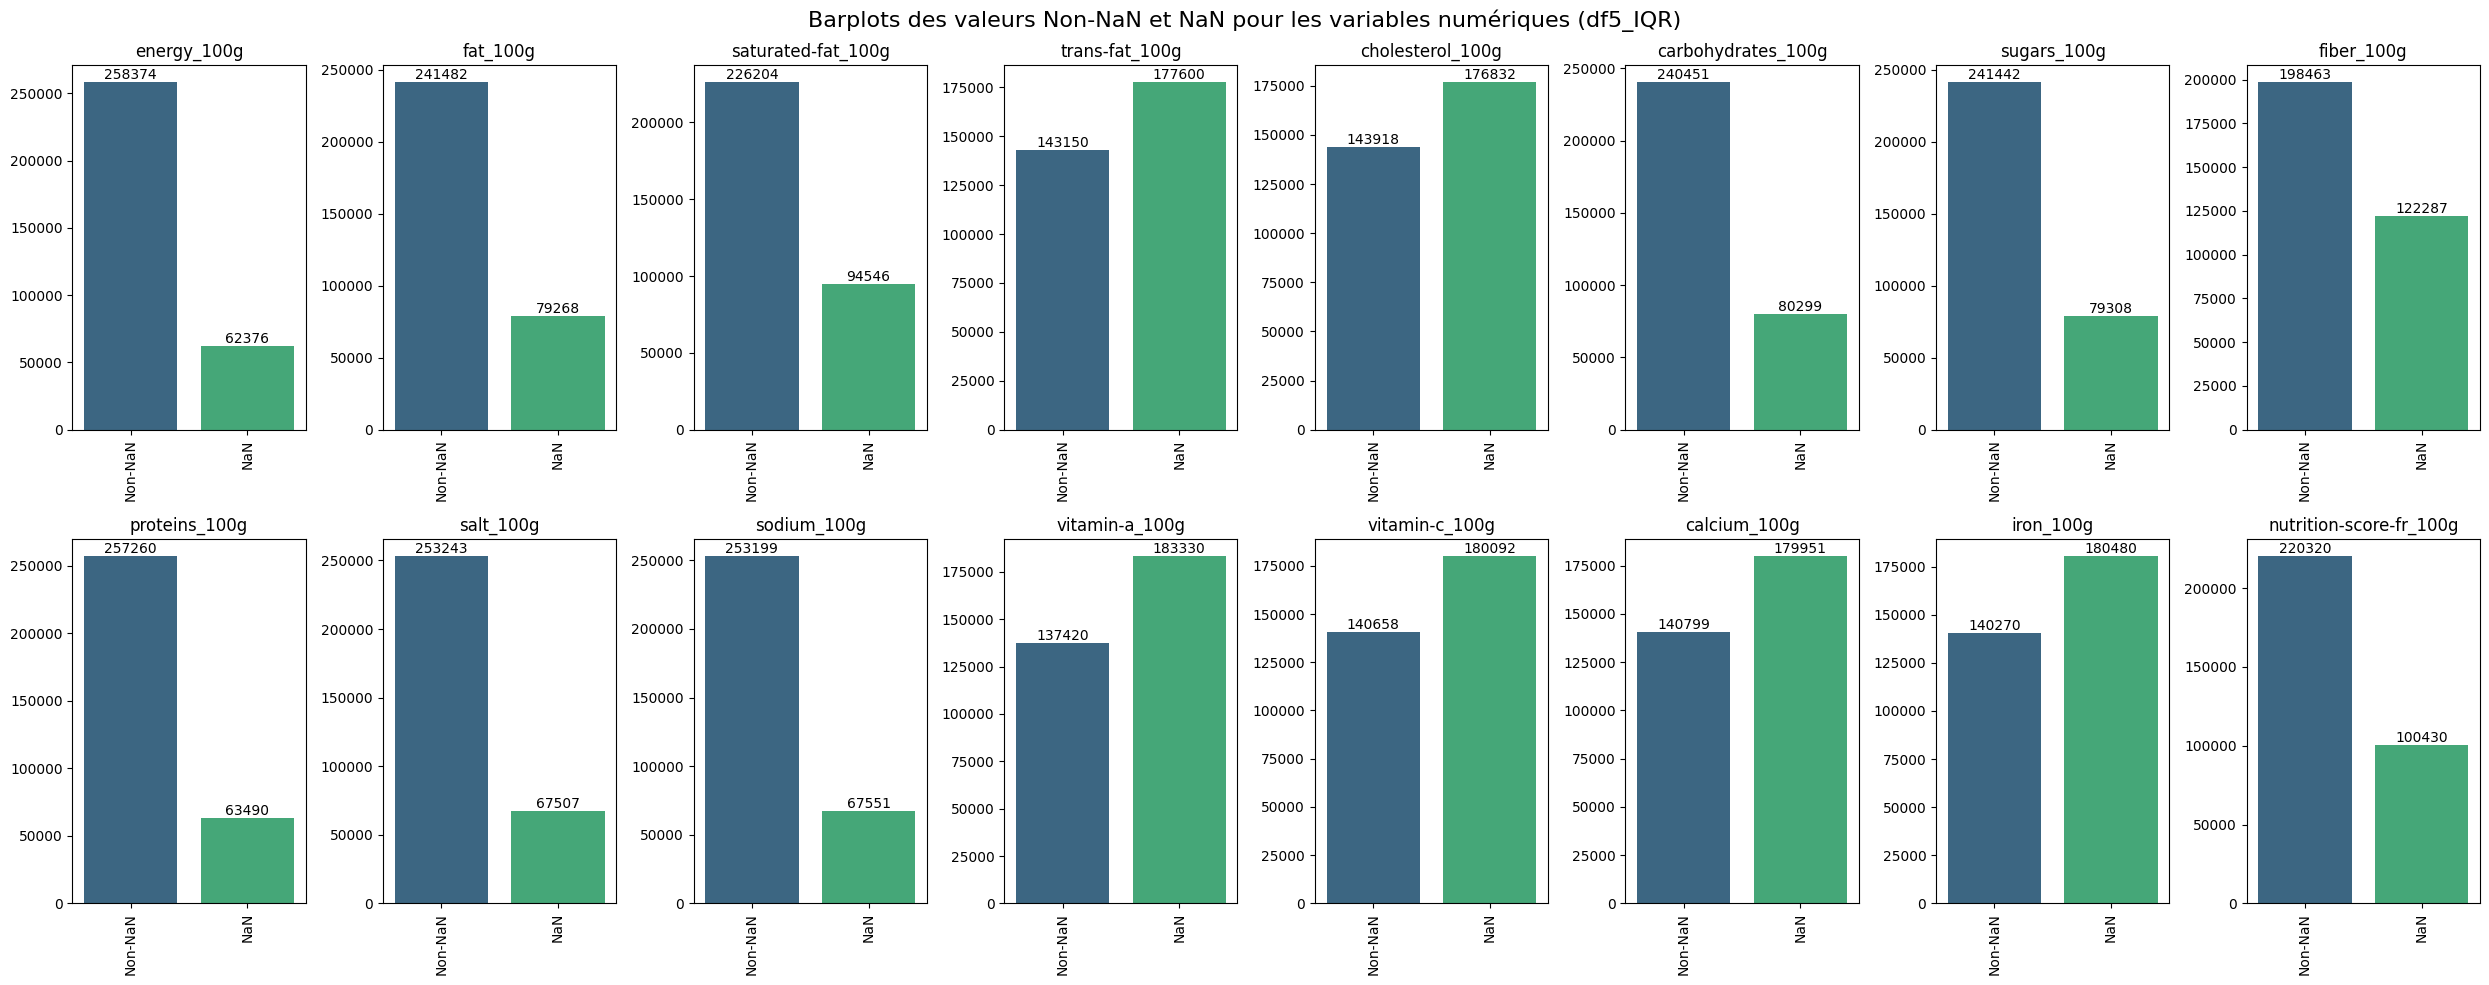

In [79]:
# Barplot pour chaque variable *_100g en quantité d'individus non nan vs nan

def create_barplots_nan(df, df_name="DataFrame"):
    # Sélectionner les colonnes numériques
    num_cols = 8
    num_rows = int(np.ceil(len(df.select_dtypes(include=['float64']).columns) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5 * num_rows))
    axes = axes.flatten()

    # Créer les barplots
    for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
        # Calculer les valeurs non NaN et NaN
        non_nan_values = df[col].notna().sum()
        nan_values = df[col].isna().sum()

        # Créer le barplot
        sns.barplot(x=['Non-NaN', 'NaN'], y=[non_nan_values, nan_values], ax=axes[i], hue=['Non-NaN', 'NaN'], palette='viridis')
        
        # Ajouter les étiquettes de données
        for j, v in enumerate([non_nan_values, nan_values]):
            axes[i].text(j, v, v, ha='center', va='bottom')

        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', labelrotation=90)

    # Supprimer les subplots vides
    for j in range(i + 1, num_cols * num_rows):
        fig.delaxes(axes[j])

    plt.suptitle(f'Barplots des valeurs Non-NaN et NaN pour les variables numériques ({df_name})', fontsize=16)
    plt.tight_layout()
    plt.show()

create_barplots_nan(df5_IQR, "df5_IQR")

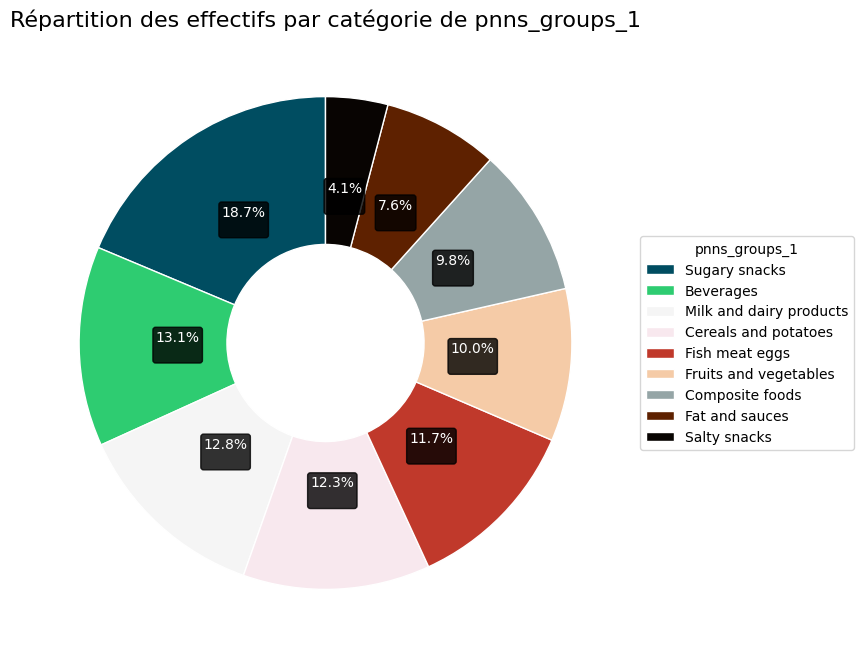

In [80]:
# Création d'un dataframe avec les effectifs par catégorie de pnns_groups_1
df8_effectifs = df5_IQR['pnns_groups_1'].value_counts().reset_index()
df8_effectifs.columns = ['pnns_groups_1', 'effectif']

def pie_chart_pnns(df, colors):
    """Crée un pie chart avec une légende à partir d'un DataFrame contenant les effectifs et les catégories pnns_groups_1.

    Args:
        df (pd.DataFrame): DataFrame avec les colonnes 'pnns_groups_1' et 'effectif'.
        colors (list): Liste de couleurs pour les segments du pie chart.
    """

    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(
        df['effectif'],
        labels=None,
        autopct=lambda pct: f'{pct:.1f}%\n',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.6, edgecolor='w'),
        textprops=dict(color="w", bbox=dict(facecolor='black', alpha=0.8, boxstyle='round,pad=0.2'))
    )

    ax.legend(
        wedges, 
        df['pnns_groups_1'],
        title="pnns_groups_1",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )

    ax.set_title('Répartition des effectifs par catégorie de pnns_groups_1', fontsize=16)
    plt.show()

# Couleurs personnalisées issues de votre charte graphique
couleurs_pnns = ["#004D61", "#2ECC71", "#F5F5F5", "#F8E8EE", "#C0392B", "#F5CBA7", "#95A5A6", "#5E2100", "#080402"]

# Utilisation de la fonction (remplacez df8_effectifs par votre DataFrame)
pie_chart_pnns(df8_effectifs, couleurs_pnns)

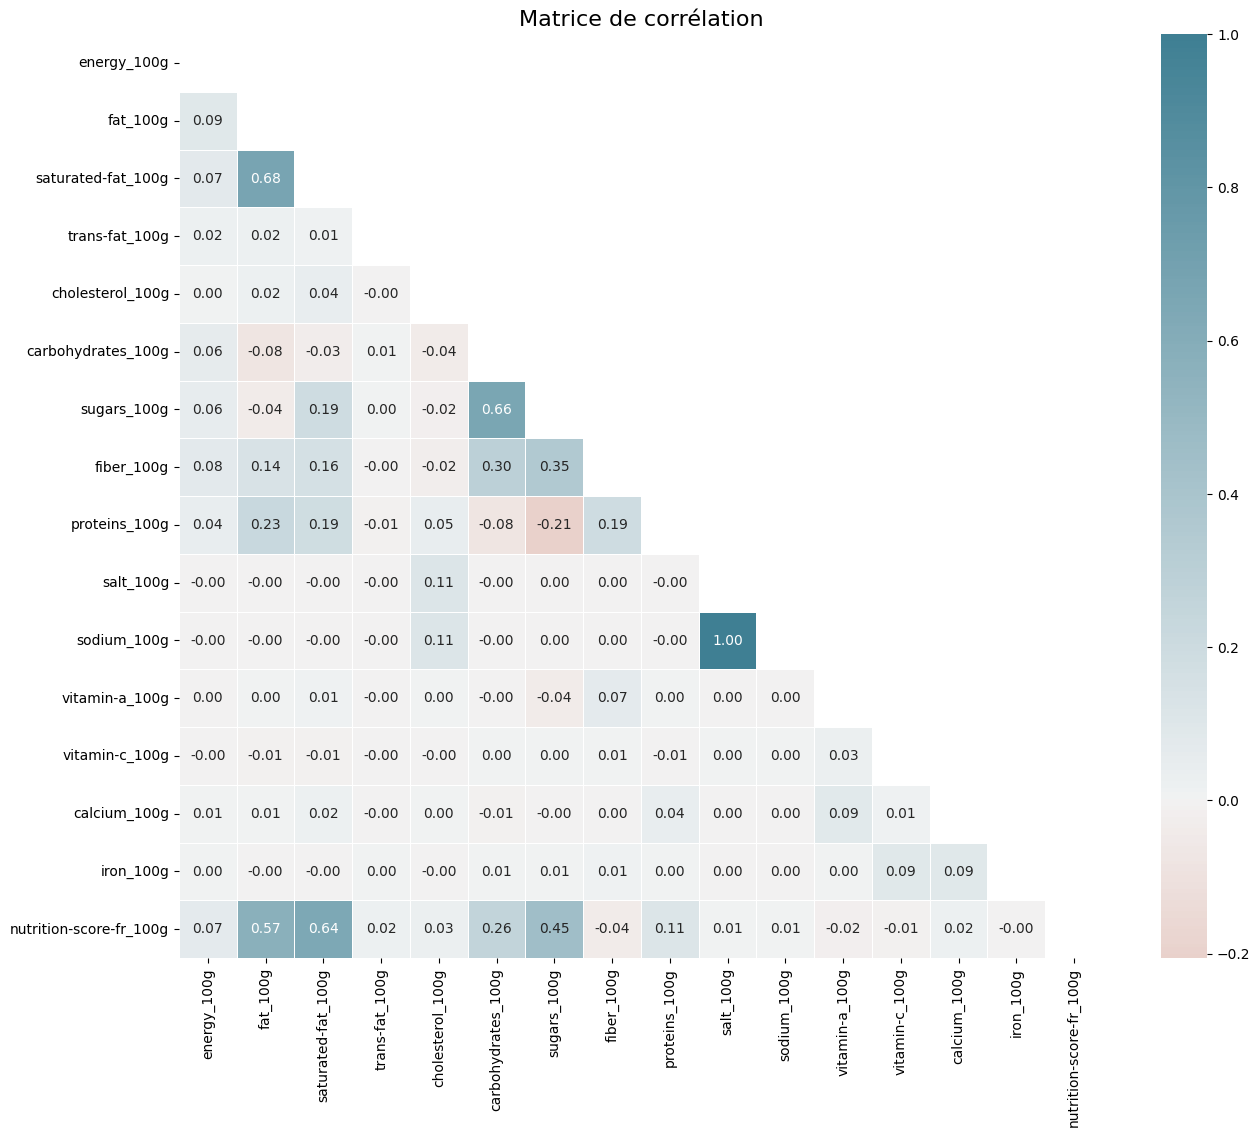

In [81]:
# Création d'un dataframe sans la variable code et pnns_groups_1
df9_corr = df5_IQR.drop(columns=['code', 'pnns_groups_1'])

def correlation_heatmap(df, figsize=(15, 12), title="Matrice de corrélation", palette="diverging"):
    """
    Crée une heatmap de corrélation à partir d'un DataFrame, en excluant les colonnes 'code' et 'pnns_groups_1'.

    Args:
        df (pd.DataFrame): DataFrame contenant les données numériques.
        figsize (tuple): Taille de la figure (largeur, hauteur).
        title (str): Titre de la heatmap.
        palette (str): Type de palette de couleurs ("diverging" ou "custom").

    Returns:
        None: Affiche la heatmap.
    """

    # Suppression des colonnes non numériques et des colonnes spécifiées
    df_corr = df.select_dtypes(include='number').drop(columns=['code', 'pnns_groups_1'], errors='ignore')

    # Calcul de la matrice de corrélation
    corr_matrix = df_corr.corr()

    # Masque pour la partie triangulaire supérieure
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Palette de couleurs
    if palette == "diverging":
        cmap = sns.diverging_palette(20, 220, as_cmap=True)
    else:
        # Remplacez par vos couleurs personnalisées si vous choisissez "custom"
        cmap = sns.color_palette("custom_palette", as_cmap=True) 

    # Création de la heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, annot=True, fmt=".2f", square=True, linewidths=0.5)
    plt.title(title, fontsize=16)
    plt.show()

# Utilisation de la fonction (remplacez df5_IQR par votre DataFrame)
correlation_heatmap(df5_IQR)

Après notre nettoyage, on peut voir qu'une très grande proportion des outliers ont correctement été remplacé par des NaN. C'est une bonne nouvelle car ça va améliorer la pertinence de l'analyse suivante. Qui nous permettra de créer je l'espère des pnns groups.

Le découpage réalisé ne me satisfait pas, sans chercher très loin je pense qu'un coude à 3/4 valeurs semblent indiquer qu'à part des variables importantes comme l'énergie, le gras, le sucre et peut être les protéines il n'y aurait pas beaucoup d'influence. Ca peut paraitre envisageable mais pour conforter mes positions je vais réaliser d'autres analyse.

In [82]:
df10_pca = df5_IQR.copy()
df10_pca = df10_pca.select_dtypes(include=['float64'])

# remplacement des NaN par la médiane
df10_pca = df10_pca.fillna(df10_pca.median())

# Standardisation des données
scaler = StandardScaler()
X10 = df10_pca.select_dtypes(include=['float64'])
X10_scaled = scaler.fit_transform(X10)

In [83]:
# Réduction de dimension avec PCA

pca = PCA()
X10_pca = pca.fit_transform(X10_scaled)

# Création d'un DataFrame pour visualiser les composantes principales
df10_pca = pd.DataFrame(X10_pca, columns=[f"PC{i+1}" for i in range(X10_pca.shape[1])])
print(df10_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.578967 -0.008963 -0.127428 -0.146767 -0.004161 -0.008109 -0.003504   
1  3.122750 -0.048198 -0.397369 -0.631256 -0.026220  0.010752 -0.080613   
2 -0.051867 -0.024769  0.404225  1.515869 -0.144316  0.002530  0.036453   
3  1.743069 -0.043730 -2.063474  0.757929 -0.141181  0.042574  0.100155   
4 -0.009658 -0.005914  1.094044  0.405891 -0.007634 -0.014924 -0.030585   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.052019 -0.007570  0.100888  0.001836 -0.146564 -0.312655 -0.142847   
1 -0.157070 -0.013058 -0.007722 -0.076898 -0.576761  0.953203  2.411834   
2  0.070612  0.007281 -0.263566  0.017416  1.377586  1.243225 -0.108474   
3 -0.252712 -0.034037 -0.129309 -0.065469  0.342334  1.327979 -1.411952   
4  0.077945 -0.000687 -0.024676  0.047206  1.048940  0.472514  0.283458   

       PC15      PC16  
0 -0.270112  0.000009  
1 -0.580833  0.000003  
2  0.424301  0.000002  
3 

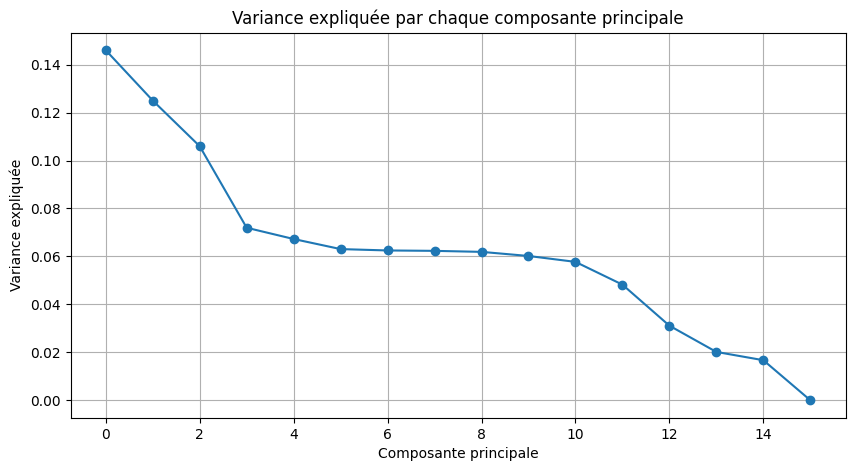

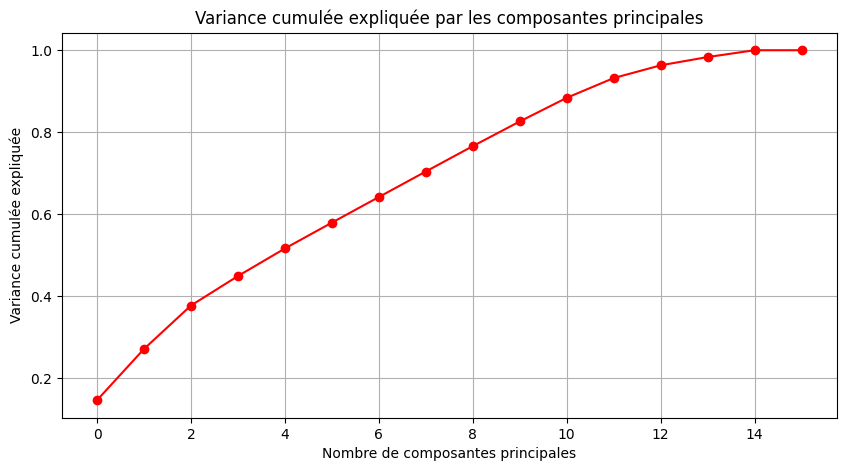

In [84]:
# Affichage de la variance expliquée par chaque composante principale
plt.figure(figsize=(10, 5))
plt.plot(pca.explained_variance_ratio_, marker='o')  # Utilisation de pca.explained_variance_ratio_
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.grid(True)
plt.show()

# Affichage de la variance cumulée expliquée par les composantes principales
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='red')  # Utilisation de pca.explained_variance_ratio_
plt.title('Variance cumulée expliquée par les composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.grid(True)
plt.show()

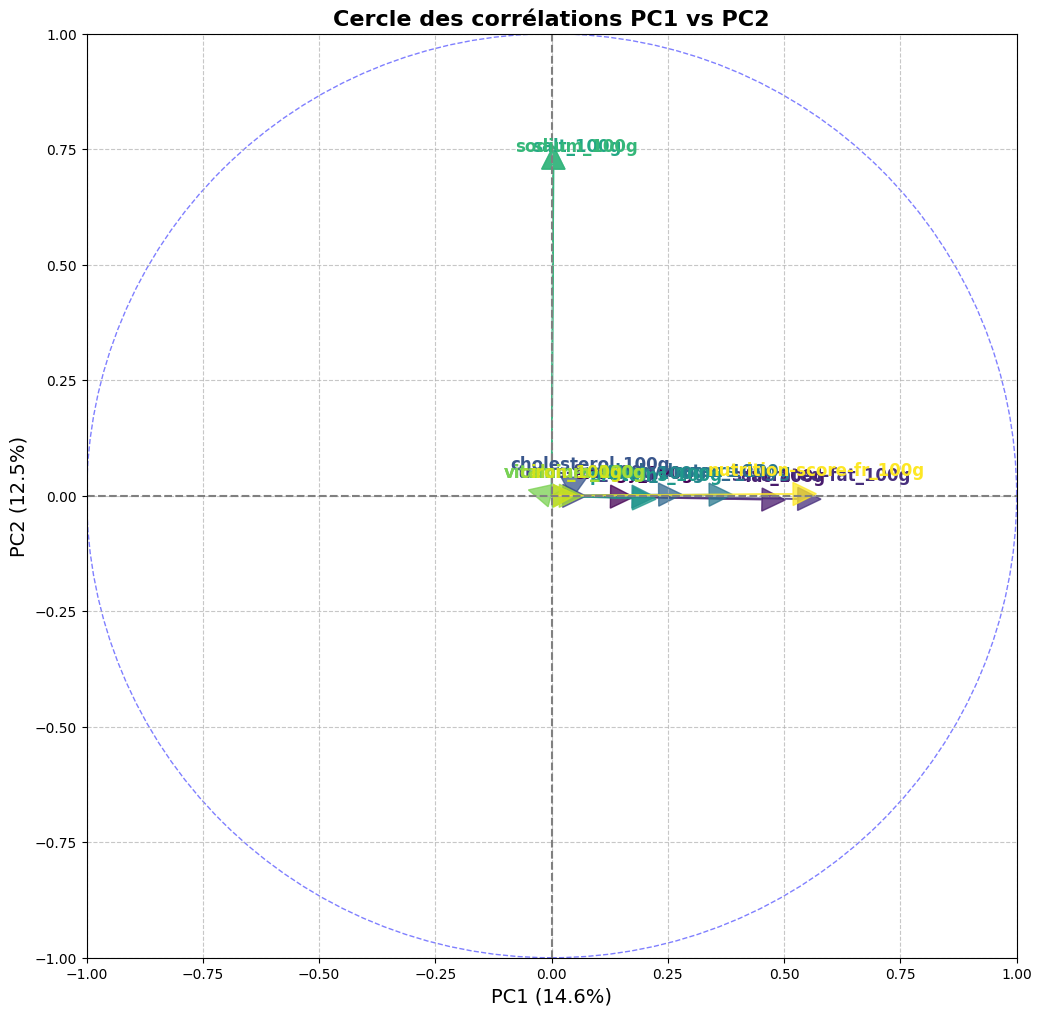

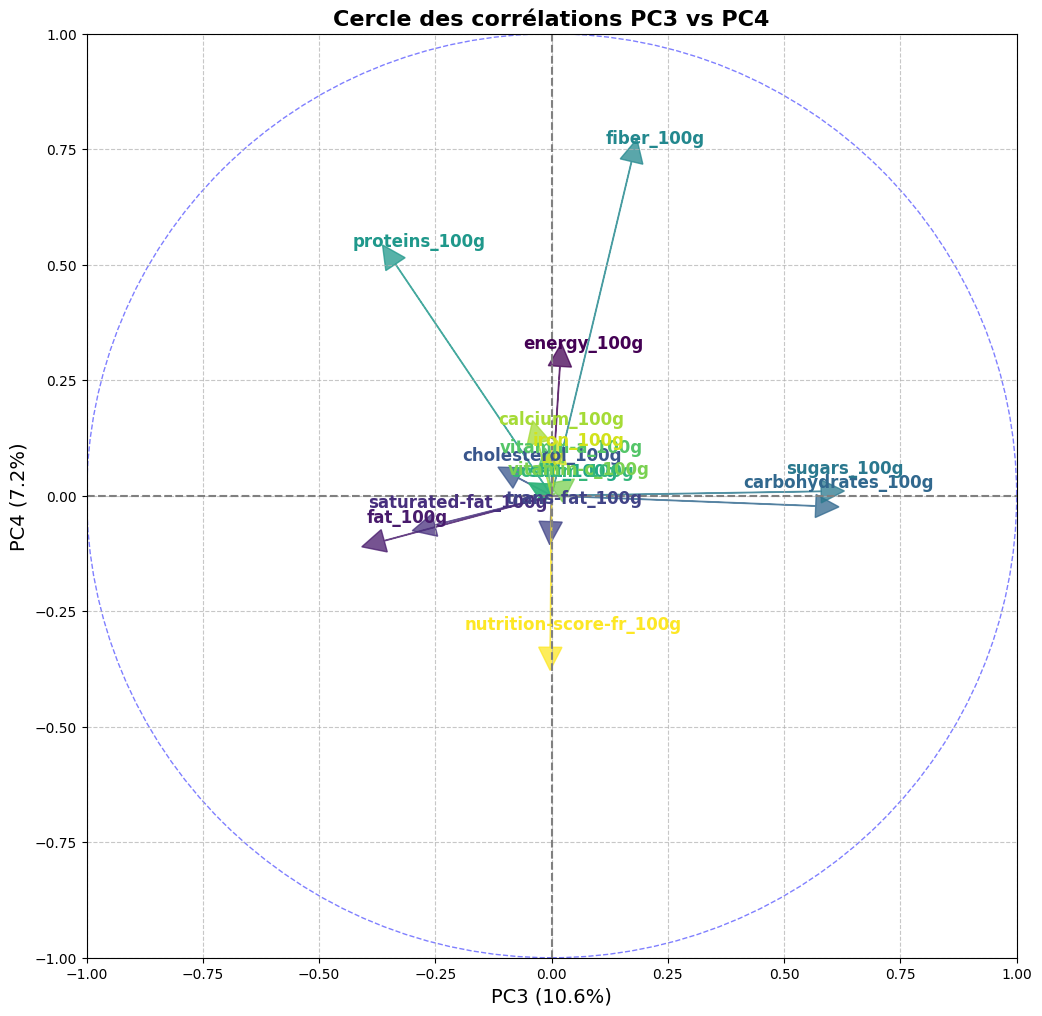

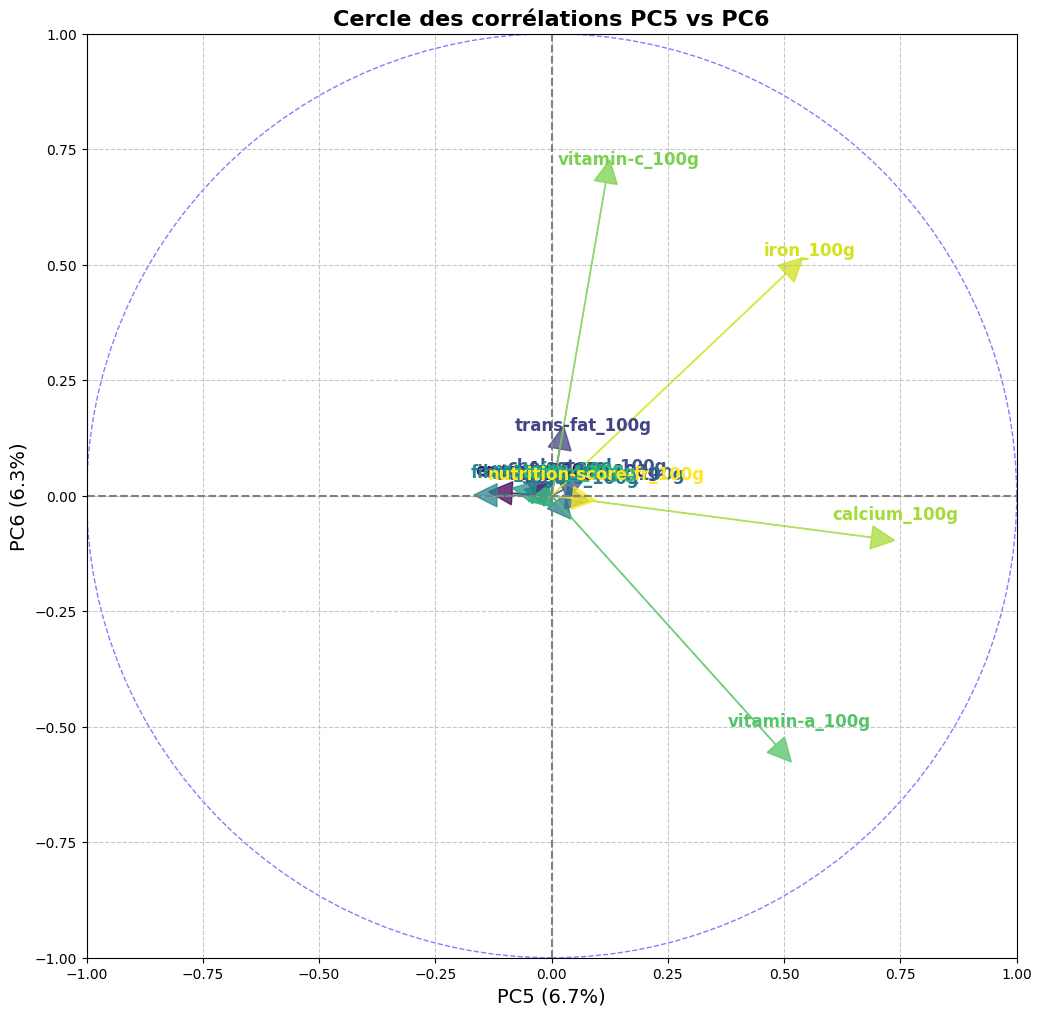

In [85]:
# Graphique des corrélations

def correlation_graph(pca, features, pc_x=0, pc_y=1, title='Cercle des corrélations'):
    plt.figure(figsize=(12, 12))
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
    for i, (component_x, component_y) in enumerate(zip(pca.components_[pc_x], pca.components_[pc_y])):
        plt.arrow(0, 0, component_x, component_y, 
                  head_width=0.05, head_length=0.05, color=colors[i], alpha=0.75)
        plt.text(component_x + 0.05, component_y + 0.05, 
                 features[i], color=colors[i], ha='center', va='center', fontsize=12, weight='bold')
    
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f'PC{pc_x+1} ({pca.explained_variance_ratio_[pc_x]*100:.1f}%)', fontsize=14)
    plt.ylabel(f'PC{pc_y+1} ({pca.explained_variance_ratio_[pc_y]*100:.1f}%)', fontsize=14)
    plt.grid(ls='--', alpha=0.7)
    plt.axhline(0, color='grey', ls='--')
    plt.axvline(0, color='grey', ls='--')
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', ls='--', alpha=0.5)
    plt.gca().add_artist(circle)
    plt.title(title, fontsize=16, weight='bold')
    plt.show()

# Appel de la fonction avec les colonnes numériques de votre DataFrame
correlation_graph(pca, X10.columns, 0, 1, 'Cercle des corrélations PC1 vs PC2')
correlation_graph(pca, X10.columns, 2, 3, 'Cercle des corrélations PC3 vs PC4')
correlation_graph(pca, X10.columns, 4, 5, 'Cercle des corrélations PC5 vs PC6')

In [86]:
# Tableau de l'influence des variables en fonctions des composantes principales

def pca_results(pca, features):
    dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]
    components = pd.DataFrame(np.round(pca.components_, 4), columns=features)
    components.index = dimensions
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=['Explained Variance'])
    variance_ratios.index = dimensions
    return pd.concat([variance_ratios, components], axis=1)

pca_results(pca, X10.columns)

# Création d'un csv pour sauvegarder les résultats (en cas de perte ou de rechargement intempestif du notebook)
results_df = pca_results(pca, X10.columns)
results_df.to_csv("pca_results_pnns.csv", index=False) 


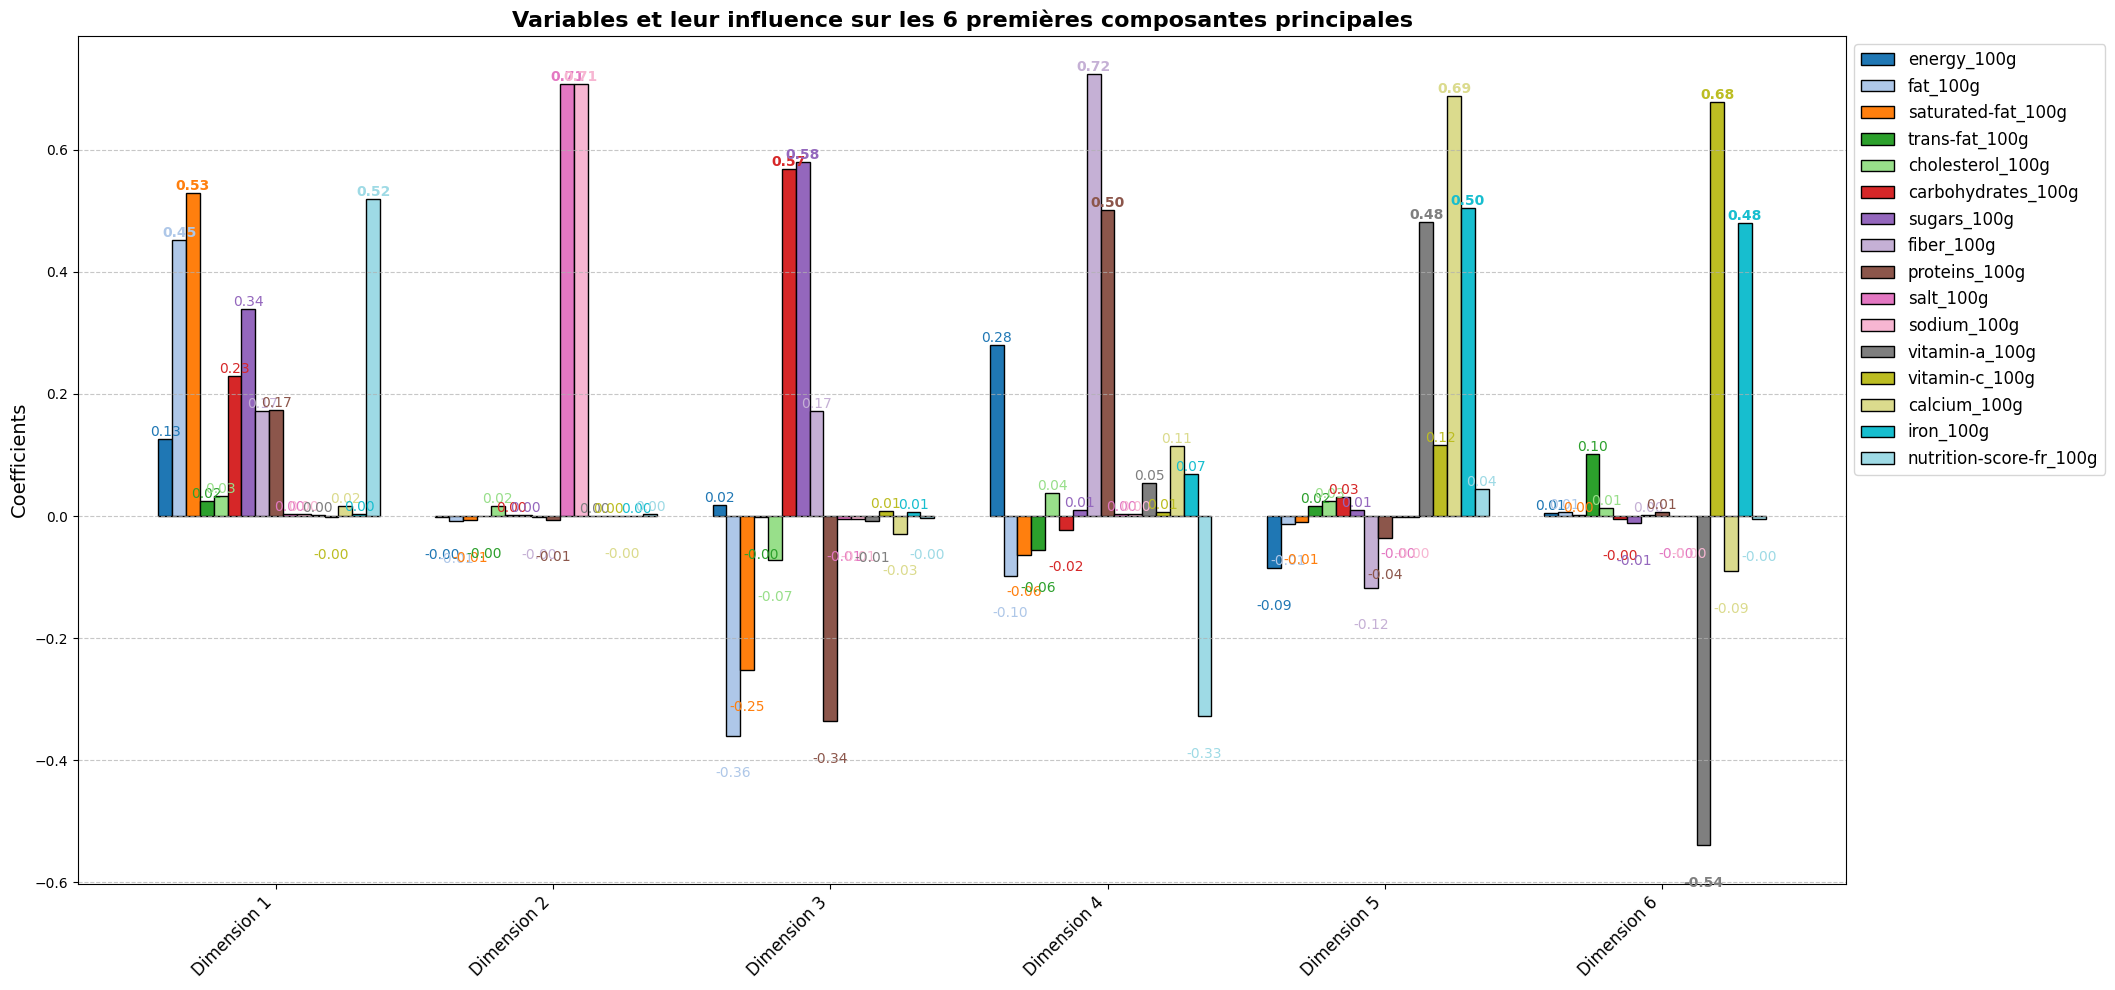

In [87]:
# Graphique des corrélations
def pca_results(pca, features):
    dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]
    components = pd.DataFrame(np.round(pca.components_, 4), columns=features)
    components.index = dimensions
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=['Explained Variance'])
    variance_ratios.index = dimensions
    return pd.concat([variance_ratios, components], axis=1)


def pca_results_graph(pca, features, num_components=6):
    dimensions = ['Dimension {}'.format(i) for i in range(1, num_components+1)]
    components = pd.DataFrame(np.round(pca.components_[:num_components], 4), columns=features)
    components.index = dimensions
    
    fig, ax = plt.subplots(figsize=(25, 10))
    cmap = plt.get_cmap('tab20', len(features))
    colors = [cmap(i) for i in range(len(features))]
    bar_width = 0.8 / len(features)  # Ajuste la largeur des barres
    
    for i, feature in enumerate(features):
        bars = ax.bar(np.arange(num_components) + i * bar_width, components[feature], bar_width, label=feature, color=colors[i], edgecolor='black')
        
        # Ajout des étiquettes de données ajustées et colorées
        for bar in bars:
            height = bar.get_height()
            if height > 0.40 or height < -0.40:
                label = f'{height:.2f}'
                weight = 'bold'
            else:
                label = f'{height:.2f}'
                weight = 'normal'
            
            # Afficher les étiquettes au-dessus des barres pour les valeurs positives et en dessous pour les valeurs négatives
            ax.text(bar.get_x() + bar.get_width() / 2, height if height >= 0 else height - 0.05, label,
                    ha='center', va='bottom' if height >= 0 else 'top', fontsize=10, color=colors[i], weight=weight)
    
    ax.set_ylabel('Coefficients', fontsize=14)
    ax.set_xticks(np.arange(num_components) + bar_width * (len(features) / 2))
    ax.set_xticklabels(dimensions, rotation=45, ha='right', fontsize=12)
    ax.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1, 1), ncol=1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.title('Variables et leur influence sur les 6 premières composantes principales', fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajuste la mise en page pour éviter le chevauchement des légendes
    plt.show()

# Utilisation des fonctions avec les 6 premières composantes
pca_results_graph(pca, X10.columns, 6)

Point de vigileance peut être qu'il faudrait réaliser une ACP sans les transfat, qui sont uniquement présent dans la catégorie de pnns_groups_1 sugary snacks. Ainsi que le nutriscore.

In [89]:
# nouvelle acp sans trans-fat_100g et nutrition-score-fr_100g
df11_pca = df5_IQR.copy()
df11_pca = df11_pca.drop(columns=['trans-fat_100g', 'nutrition-score-fr_100g'])

# standardisation des données
scaler = StandardScaler()
X11 = df11_pca.select_dtypes(include=['float64'])
X11_scaled = scaler.fit_transform(X11)

# Remplacement des NaN par le knn imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X11_imputed = imputer.fit_transform(X11_scaled)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.001417 -0.008773  0.052204  0.040352 -0.021260 -0.013267 -0.027001   
1 -0.139850  0.324071  2.214075  1.280241 -0.987608 -0.965386  0.357457   
2 -0.034149  0.022435  0.306243  0.562992  0.560072  1.075689 -0.383364   
3 -0.126023  0.485641  2.314142 -0.576367  0.079300  0.174696 -0.103856   
4  0.017373 -0.202359 -0.753663  0.546159  0.440071  0.581448 -0.243427   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0 -0.015161  0.005348 -0.011891  0.008568 -0.008089 -0.017542 -0.000001  
1  0.075878 -0.175721 -0.004860 -0.006490 -0.552795 -1.800418  0.000071  
2  0.008187 -0.816615 -0.293403 -0.200325  0.654521  0.243337  0.000072  
3 -0.029011 -0.261270 -0.194611 -0.284960  1.320855  1.008838  0.000037  
4  0.081542 -0.733850 -0.221350 -0.140250  0.721508 -0.926089  0.000046  


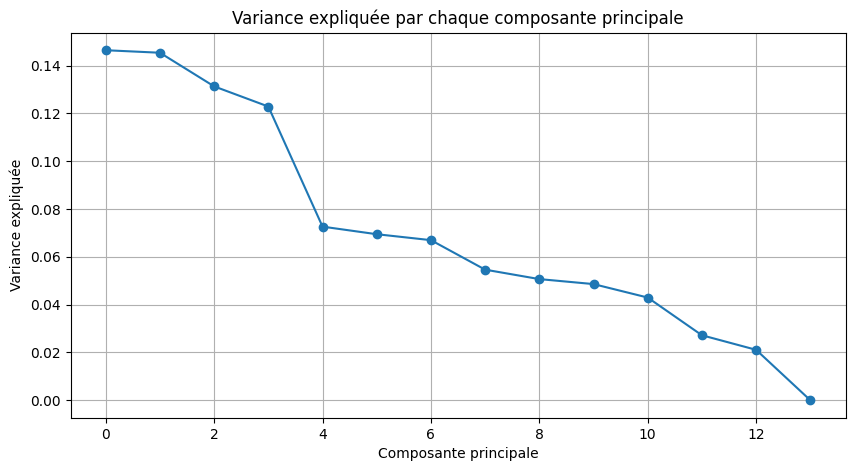

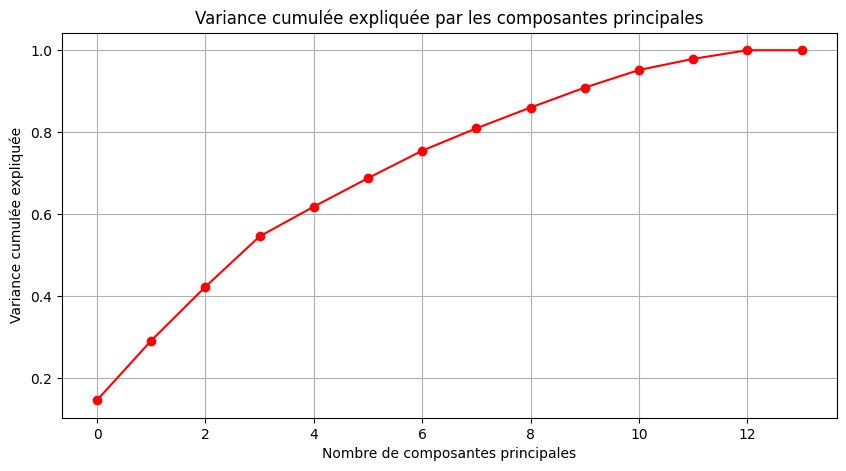

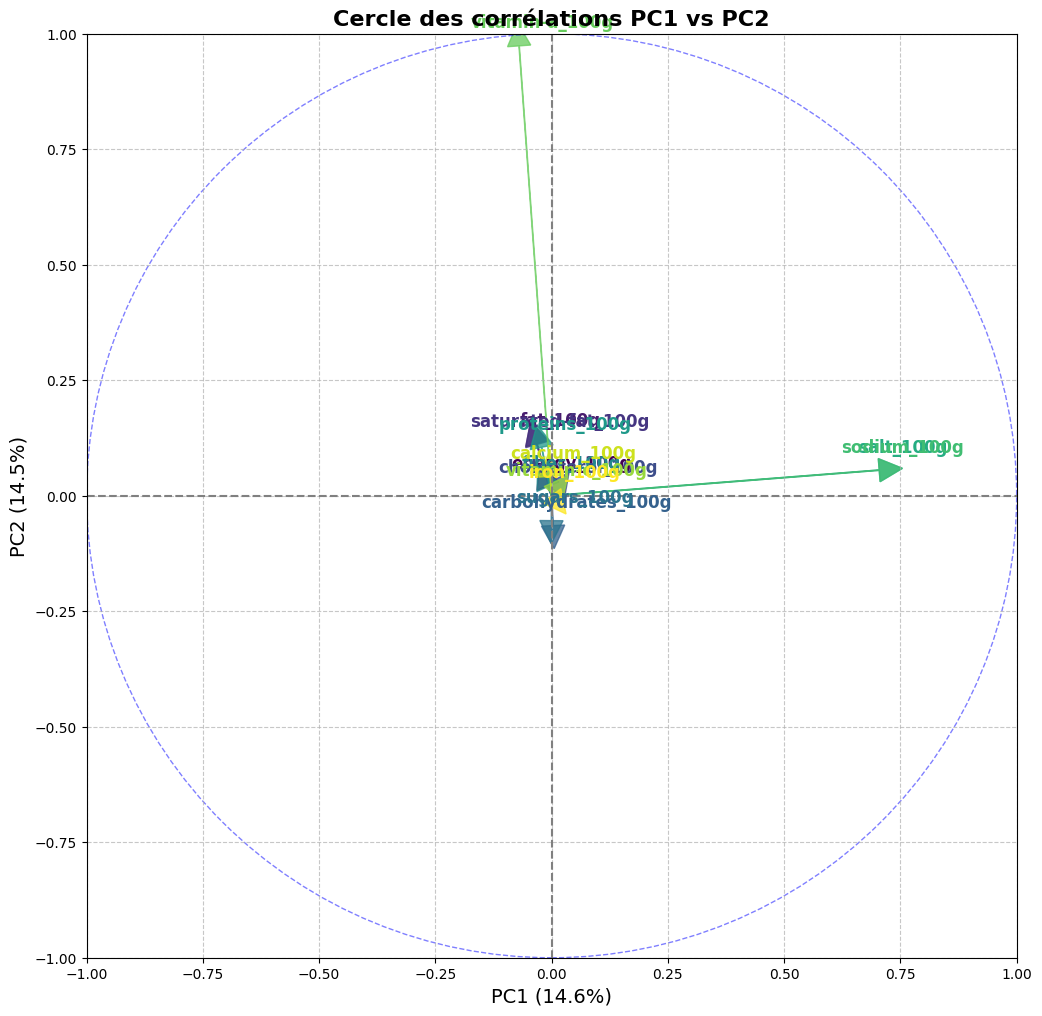

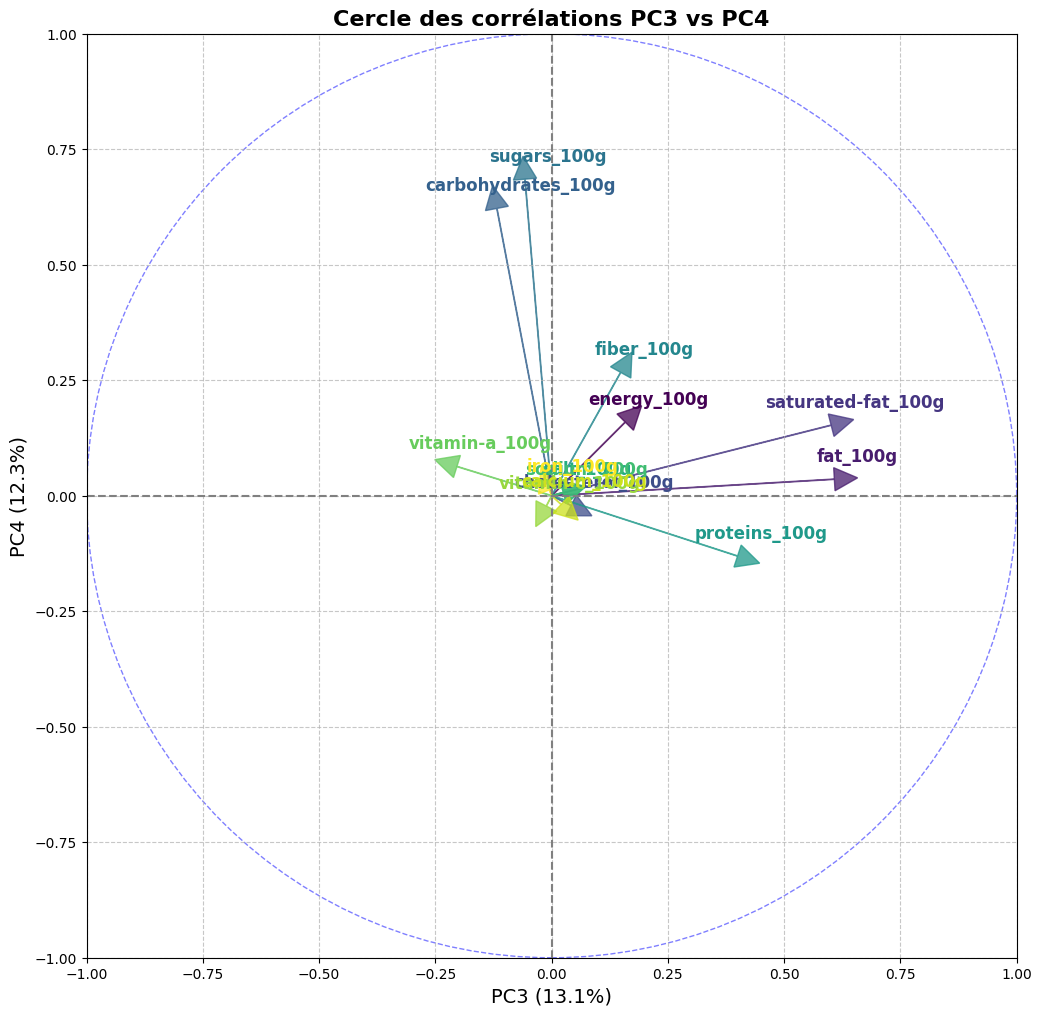

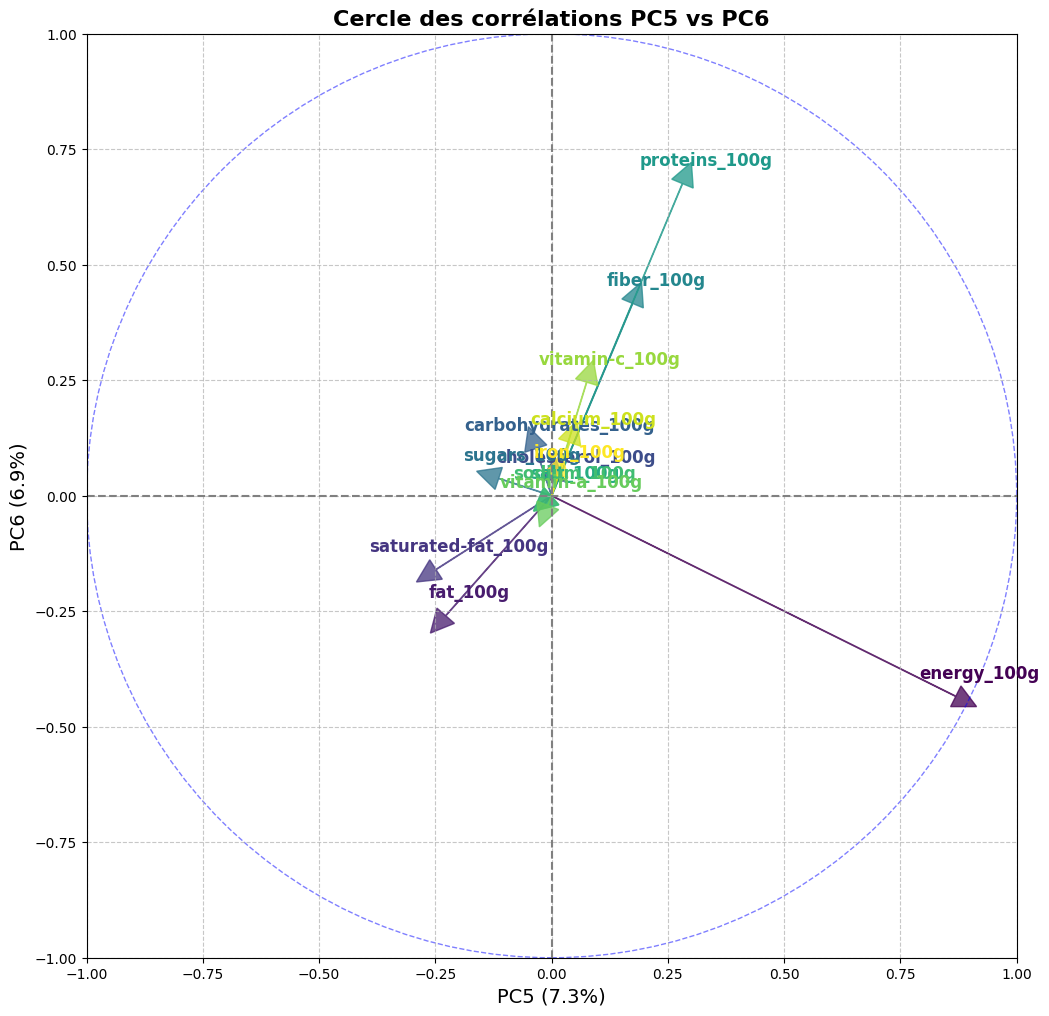

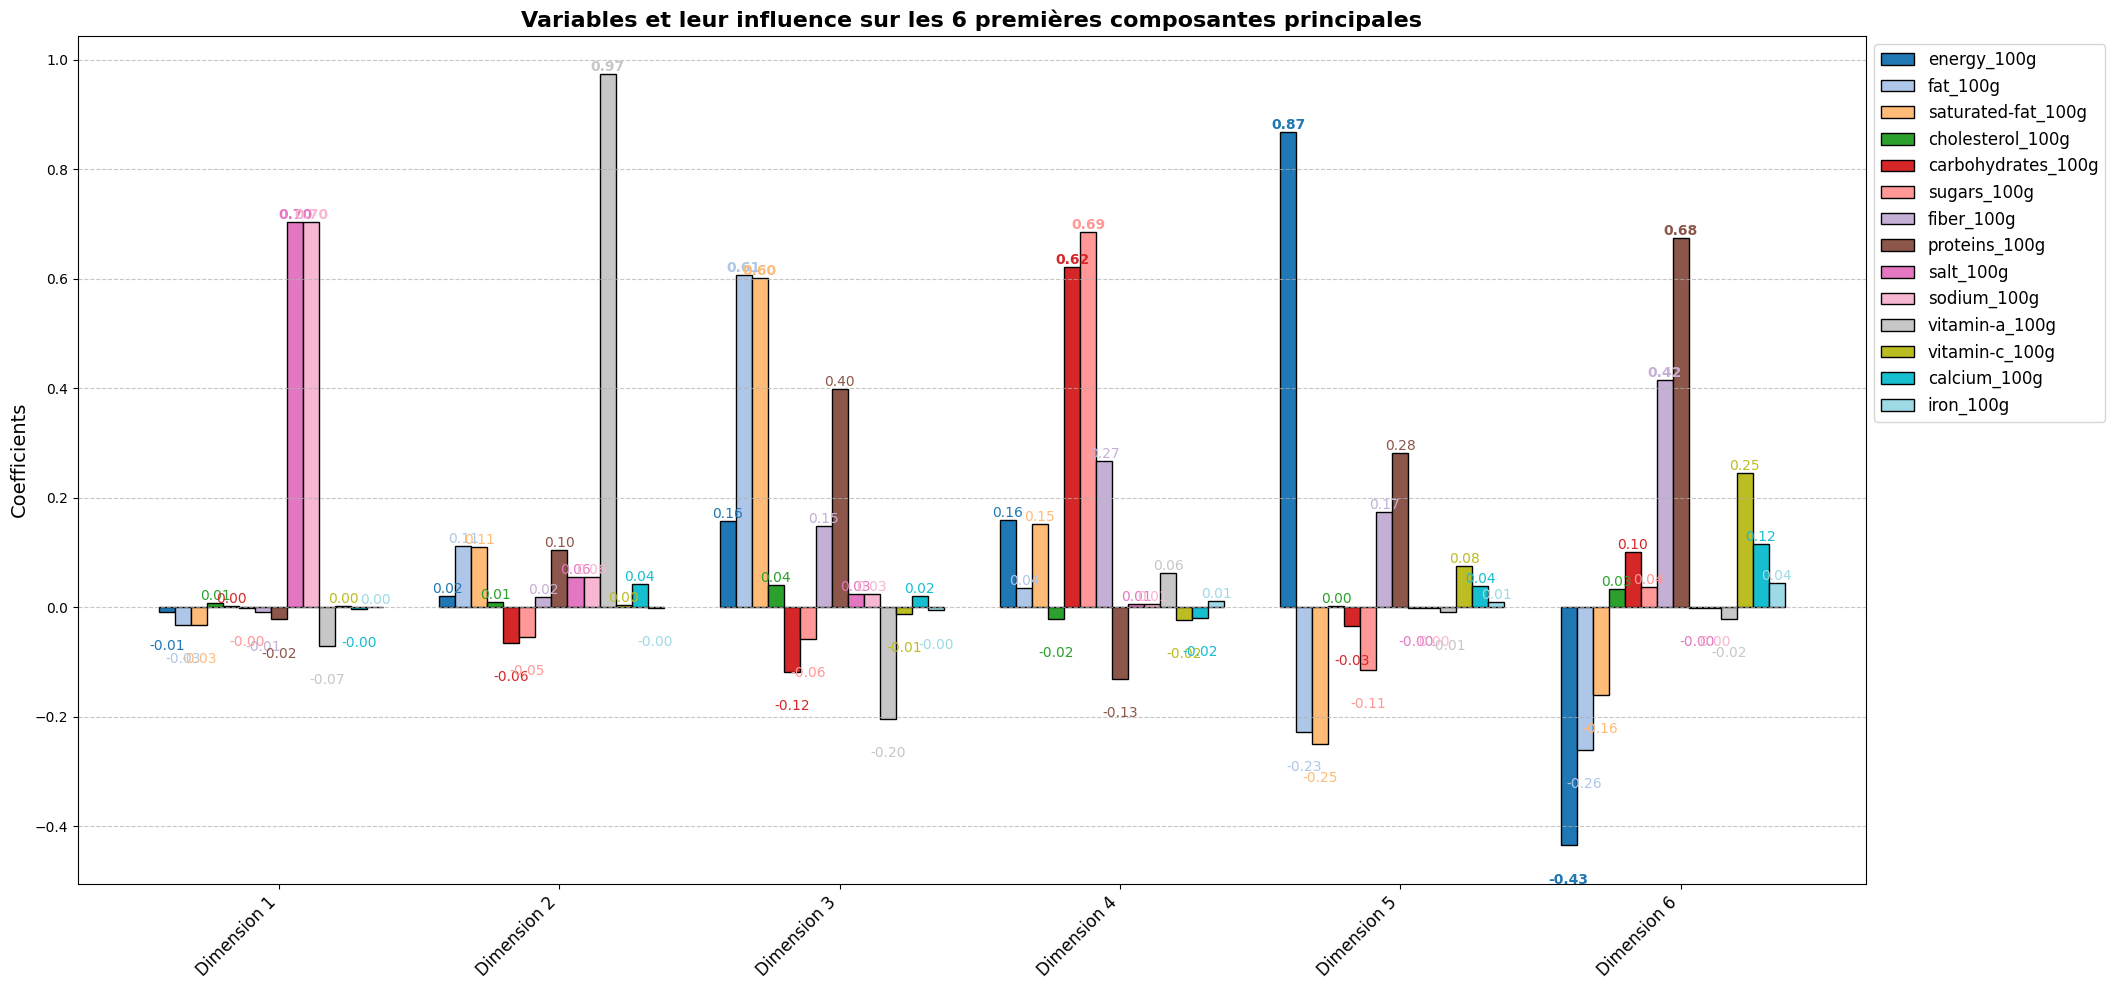

In [90]:
# Réduction de dimension avec PCA
pca = PCA()
X11_pca = pca.fit_transform(X11_imputed)

# Création d'un DataFrame pour visualiser les composantes principales
df11_pca = pd.DataFrame(X11_pca, columns=[f"PC{i+1}" for i in range(X11_pca.shape[1])])
print(df11_pca.head())

# Affichage de la variance expliquée par chaque composante principale
plt.figure(figsize=(10, 5))
plt.plot(pca.explained_variance_ratio_, marker='o')  # Utilisation de pca.explained_variance_ratio_
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.grid(True)
plt.show()

# Affichage de la variance cumulée expliquée par les composantes principales
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='red')  # Utilisation de pca.explained_variance_ratio_
plt.title('Variance cumulée expliquée par les composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.grid(True)
plt.show()

# Graphique des corrélations
correlation_graph(pca, X11.columns, 0, 1, 'Cercle des corrélations PC1 vs PC2')
correlation_graph(pca, X11.columns, 2, 3, 'Cercle des corrélations PC3 vs PC4')
correlation_graph(pca, X11.columns, 4, 5, 'Cercle des corrélations PC5 vs PC6')

# Tableau de l'influence des variables en fonctions des composantes principales
pca_results(pca, X11.columns)

# Création d'un csv pour sauvegarder les résultats (en cas de perte ou de rechargement intempestif du notebook)
results_df = pca_results(pca, X11.columns)
results_df.to_csv("pca_results_pnns_knn.csv", index=False)

# Utilisation des fonctions avec les 6 premières composantes
pca_results_graph(pca, X11.columns, 6)



La méthode des KNN a l'air plus précise pour expliquer la variance, mais j'ai également supprimé des données qui autrement aurait pu être intéressante dans l'analyse. Quoi qu'il en soit, je pense qu'il ne faut pas accorder trop d'importance à ces nouvelles dimenssions car elle ne permettent pas de réduire significativement le nombre de variable.